In [1]:
# Data Science Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Linear ALgorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Machine Learning proccessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# Read in CSV
df = pd.read_csv("FinalDS.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Returns      1825 non-null   float64
 1   Volatility   1825 non-null   float64
 2   Node         1830 non-null   object 
 3   Date         1830 non-null   object 
 4   Sit          1830 non-null   float64
 5   INV          1830 non-null   int64  
 6   DNG          1830 non-null   float64
 7   QNG          1830 non-null   float64
 8   HHDiffit     1830 non-null   float64
 9   Ft           1830 non-null   float64
 10  COT          1830 non-null   int64  
 11  HHst         1830 non-null   float64
 12  TFE          1830 non-null   int64  
 13  Unnamed: 13  1829 non-null   object 
dtypes: float64(8), int64(3), object(3)
memory usage: 200.3+ KB


In [4]:
df.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0       NaN         NaN  East   1/1/2010  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East   1/8/2010  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East  1/15/2010  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East  1/22/2010  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East  1/29/2010  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  TFE  Unnamed: 13  
0     -1.78  5.770  724087  5.88    1          NaN  
1     -1.10  5.818  760159  6.56    2  0.231652755  
2     -1.98  5.610  782549  5.68    3   1.17557333  
3     -2.10  5.625  769887  5.56    4     0.117681  
4     -2.19  5.350  782673  5.47    5  0.083928398

In [5]:
df.describe()

Returns   Volatility          Sit          INV            DNG  \
count  1825.000000  1825.000000  1830.000000  1830.000000    1830.000000   
mean     -0.006612     0.230426     5.007738   559.764481   89909.475410   
std       0.419628     0.355495     1.566180   348.303130   51761.103874   
min      -4.025352     0.000135     2.250000    80.000000   20309.200000   
25%      -0.112186     0.036834     3.980000   249.250000   46073.000000   
50%       0.000000     0.103798     4.720000   482.500000   71874.750000   
75%       0.093332     0.265059     5.720000   874.000000  131413.000000   
max       3.465736     4.058148    11.350000  1370.000000  259140.250000   

                 QNG     HHDiffit           Ft           COT         HHst  \
count    1830.000000  1830.000000  1830.000000  1.830000e+03  1830.000000   
mean    91564.290164    -1.519760     3.493694  1.055391e+06     3.487978   
std     95923.960180     1.356882     0.872201  1.749606e+05     0.936041   
min         0.000000    -7.230000     1.687000  7.240870e+05     1.570000   
25%      4879.750000    -2.070000     2.772000  9.489800e+05     2.790000   
50%     81122.500000    -1.120000     3.611500  1.019501e+06     3.540000   
75%    132187.387500    -0.600000     4.172000  1.174981e+06     4.150000   
max    302955.500000     1.660000     5.975000  1.573733e+06     6.560000   

               TFE  
count  1830.000000  
mean    183.500000  
std     105.683584  
min       1.000000  
25%      92.000000  
50%     183.500000  
75%     275.000000  
max     366.000000

In [6]:
df.corr()

Returns  Volatility       Sit       INV       DNG       QNG  \
Returns     1.000000    0.002303  0.076300 -0.016473 -0.005002 -0.020108   
Volatility  0.002303    1.000000 -0.139764 -0.018195 -0.004930  0.048203   
Sit         0.076300   -0.139764  1.000000 -0.049910  0.247112 -0.061842   
INV        -0.016473   -0.018195 -0.049910  1.000000  0.553788  0.420146   
DNG        -0.005002   -0.004930  0.247112  0.553788  1.000000  0.391351   
QNG        -0.020108    0.048203 -0.061842  0.420146  0.391351  1.000000   
HHDiffit   -0.094882    0.282832 -0.804160 -0.058615 -0.283760  0.034444   
Ft         -0.019534    0.174906  0.503202 -0.148005 -0.010827 -0.056424   
COT        -0.000457    0.063871 -0.147051 -0.021293  0.021907  0.034047   
HHst       -0.010059    0.177772  0.507488 -0.168477  0.002130 -0.053544   
TFE        -0.005951   -0.041092 -0.354741  0.069823  0.041992  0.089608   

            HHDiffit        Ft       COT      HHst       TFE  
Returns    -0.094882 -0.019534 -0.000457 -0.010059 -0.005951  
Volatility  0.282832  0.174906  0.063871  0.177772 -0.041092  
Sit        -0.804160  0.503202 -0.147051  0.507488 -0.354741  
INV        -0.058615 -0.148005 -0.021293 -0.168477  0.069823  
DNG        -0.283760 -0.010827  0.021907  0.002130  0.041992  
QNG         0.034444 -0.056424  0.034047 -0.053544  0.089608  
HHDiffit    1.000000  0.096669  0.042539  0.104079  0.044946  
Ft          0.096669  1.000000 -0.207299  0.982086 -0.571199  
COT         0.042539 -0.207299  1.000000 -0.184381  0.307099  
HHst        0.104079  0.982086 -0.184381  1.000000 -0.528398  
TFE         0.044946 -0.571199  0.307099 -0.528398  1.000000

In [7]:
corrs = df.corr()

In [8]:
corrs

Returns  Volatility       Sit       INV       DNG       QNG  \
Returns     1.000000    0.002303  0.076300 -0.016473 -0.005002 -0.020108   
Volatility  0.002303    1.000000 -0.139764 -0.018195 -0.004930  0.048203   
Sit         0.076300   -0.139764  1.000000 -0.049910  0.247112 -0.061842   
INV        -0.016473   -0.018195 -0.049910  1.000000  0.553788  0.420146   
DNG        -0.005002   -0.004930  0.247112  0.553788  1.000000  0.391351   
QNG        -0.020108    0.048203 -0.061842  0.420146  0.391351  1.000000   
HHDiffit   -0.094882    0.282832 -0.804160 -0.058615 -0.283760  0.034444   
Ft         -0.019534    0.174906  0.503202 -0.148005 -0.010827 -0.056424   
COT        -0.000457    0.063871 -0.147051 -0.021293  0.021907  0.034047   
HHst       -0.010059    0.177772  0.507488 -0.168477  0.002130 -0.053544   
TFE        -0.005951   -0.041092 -0.354741  0.069823  0.041992  0.089608   

            HHDiffit        Ft       COT      HHst       TFE  
Returns    -0.094882 -0.019534 -0.000457 -0.010059 -0.005951  
Volatility  0.282832  0.174906  0.063871  0.177772 -0.041092  
Sit        -0.804160  0.503202 -0.147051  0.507488 -0.354741  
INV        -0.058615 -0.148005 -0.021293 -0.168477  0.069823  
DNG        -0.283760 -0.010827  0.021907  0.002130  0.041992  
QNG         0.034444 -0.056424  0.034047 -0.053544  0.089608  
HHDiffit    1.000000  0.096669  0.042539  0.104079  0.044946  
Ft          0.096669  1.000000 -0.207299  0.982086 -0.571199  
COT         0.042539 -0.207299  1.000000 -0.184381  0.307099  
HHst        0.104079  0.982086 -0.184381  1.000000 -0.528398  
TFE         0.044946 -0.571199  0.307099 -0.528398  1.000000

[]

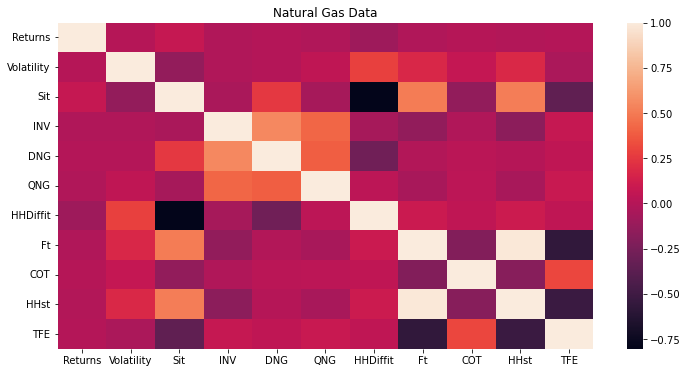

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(corrs)

plt.title('Natural Gas Data')
plt.plot()

In [10]:
df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'TFE', 'Unnamed: 13'],
      dtype='object')

In [134]:
type(df.Date)

pandas.core.series.Series

In [28]:
colsnew = ['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [29]:
dfnew = df.loc[:, colsnew]
dfnew

Returns  Volatility           Node        Date    Sit   INV  \
0              NaN         NaN           East    1/1/2010   7.66   769   
1    -4.813032e-01    0.484173           East    1/8/2010   7.66   703   
2     5.877867e-01    0.595347           East   1/15/2010   7.66   642   
3     5.884050e-02    0.061240           East   1/22/2010   7.66   616   
4     4.196420e-02    0.044199           East   1/29/2010   7.66   582   
5     1.677563e-01    0.171219           East    2/5/2010   8.06   523   
6    -3.137512e-02    0.029855           East   2/12/2010   8.06   471   
7     5.427689e-02    0.056632           East   2/19/2010   8.06   425   
8     1.854613e-01    0.189097           East   2/26/2010   8.06   390   
9    -3.140000e-03    0.001340           East    3/5/2010   7.92   349   
10    8.727340e-02    0.089951           East   3/12/2010   7.92   341   
11    6.147186e-02    0.063897           East   3/19/2010   7.92   334   
12    5.791092e-02    0.060302           East   3/26/2010   7.92   336   
13    1.690195e-01    0.172494           East    4/2/2010   8.45   333   
14   -3.965277e-02    0.038214           East    4/9/2010   8.45   358   
15   -1.357487e-02    0.011881           East   4/16/2010   8.45   376   
16    1.581954e-02    0.017800           East   4/23/2010   8.45   397   
17   -3.886203e-02    0.037415           East   4/30/2010   8.45   416   
18    1.904470e-01    0.194131           East    5/7/2010   9.13   444   
19   -4.936837e-02    0.048024           East   5/14/2010   9.13   463   
20   -1.427139e-02    0.012585           East   5/21/2010   9.13   491   
21    1.629364e-02    0.018278           East   5/28/2010   9.13   518   
22    4.541748e-02    0.047686           East    6/4/2010   9.62   545   
23   -5.761275e-02    0.056349           East   6/11/2010   9.62   571   
24   -7.868031e-02    0.077622           East   6/18/2010   9.62   596   
25    3.692059e-02    0.039107           East   6/25/2010   9.62   615   
26    1.372558e-01    0.140421           East    7/2/2010  10.04   638   
27    1.860000e-03    0.003700           East    7/9/2010  10.04   659   
28    3.105272e-02    0.033182           East   7/16/2010  10.04   681   
29   -2.919916e-02    0.027658           East   7/23/2010  10.04   698   
30   -2.058071e-02    0.018956           East   7/30/2010  10.04   716   
31    7.113299e-02    0.073653           East    8/6/2010  10.48   737   
32    6.475857e-02    0.067216           East   8/13/2010  10.48   758   
33    1.960847e-02    0.021626           East   8/20/2010  10.48   781   
34    5.355610e-02    0.055904           East   8/27/2010  10.48   805   
35   -1.084327e-01    0.107665           East    9/3/2010   9.61   814   
36   -6.860000e-03    0.005100           East   9/10/2010   9.61   835   
37   -3.681397e-02    0.035347           East   9/17/2010   9.61   856   
38    0.000000e+00    0.001826           East   9/24/2010   9.61   876   
39   -7.039193e-01    0.708961           East   10/1/2010   6.56   896   
40    9.301020e-02    0.095743           East   10/8/2010   6.56   912   
41    9.820000e-03    0.011700           East  10/15/2010   6.56   930   
42    3.834336e-02    0.040543           East  10/22/2010   6.56   940   
43    1.863408e-02    0.020642           East  10/29/2010   6.56   955   
44   -1.706971e-01    0.170537           East   11/5/2010   6.13   950   
45   -1.200667e-01    0.119412           East  11/12/2010   6.13   940   
46   -1.242252e-02    0.010718           East  11/19/2010   6.13   940   
47   -7.346715e-02    0.072358           East  11/26/2010   6.13   940   
48    1.687773e-01    0.172250           East   12/3/2010   6.84   918   
49   -1.036784e-01    0.102864           East  12/10/2010   6.84   862   
50    8.068891e-02    0.083302           East  12/17/2010   6.84   807   
51    6.381151e-02    0.066260           East  12/24/2010   6.84   756   
52   -2.578412e-02    0.024210           East  12/31/2010   6.84   715   
53   -2.064919e

In [30]:
corrsnew = dfnew.corr()

[]

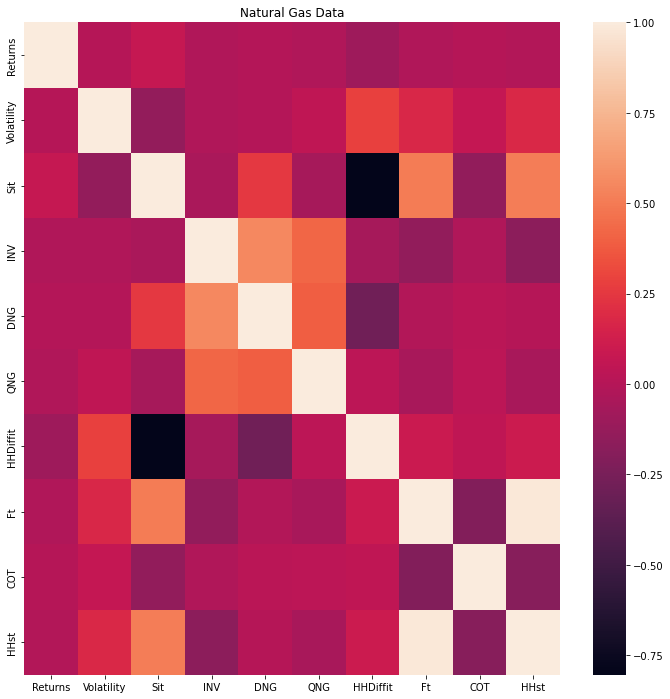

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(corrsnew)

plt.title('Natural Gas Data')
plt.plot()

In [ ]:
# 060822 - explain the difference between the correlation heatmaps.

In [135]:
dfnew.describe()

Returns   Volatility          Sit          INV            DNG  \
count  1825.000000  1825.000000  1830.000000  1830.000000    1830.000000   
mean     -0.006612     0.230426     5.007738   559.764481   89909.475410   
std       0.419628     0.355495     1.566180   348.303130   51761.103874   
min      -4.025352     0.000135     2.250000    80.000000   20309.200000   
25%      -0.112186     0.036834     3.980000   249.250000   46073.000000   
50%       0.000000     0.103798     4.720000   482.500000   71874.750000   
75%       0.093332     0.265059     5.720000   874.000000  131413.000000   
max       3.465736     4.058148    11.350000  1370.000000  259140.250000   

                 QNG     HHDiffit           Ft           COT         HHst  
count    1830.000000  1830.000000  1830.000000  1.830000e+03  1830.000000  
mean    91564.290164    -1.519760     3.493694  1.055391e+06     3.487978  
std     95923.960180     1.356882     0.872201  1.749606e+05     0.936041  
min         0.000000    -7.230000     1.687000  7.240870e+05     1.570000  
25%      4879.750000    -2.070000     2.772000  9.489800e+05     2.790000  
50%     81122.500000    -1.120000     3.611500  1.019501e+06     3.540000  
75%    132187.387500    -0.600000     4.172000  1.174981e+06     4.150000  
max    302955.500000     1.660000     5.975000  1.573733e+06     6.560000

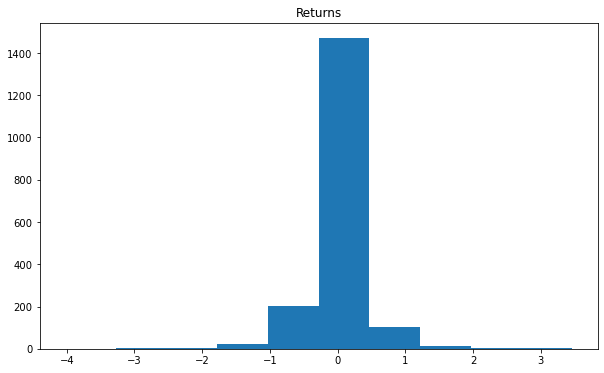

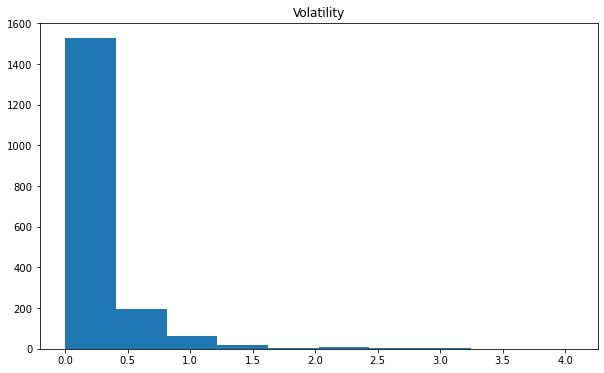

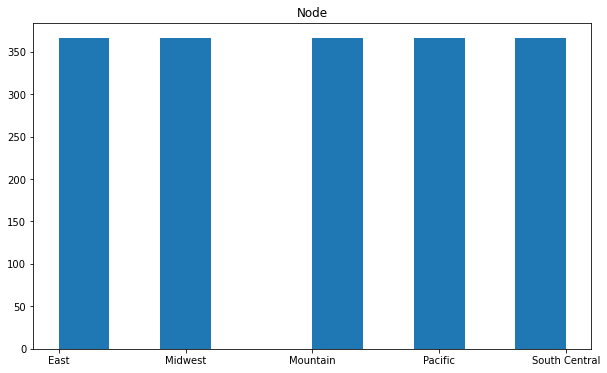

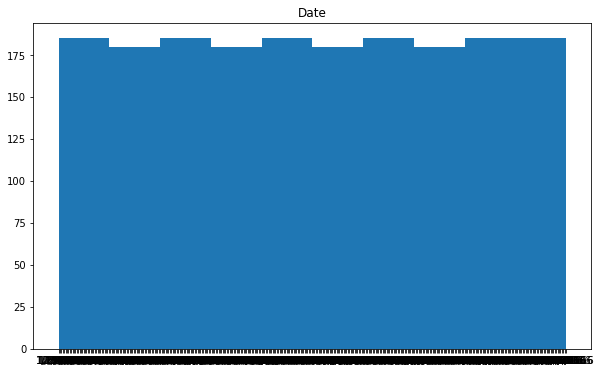

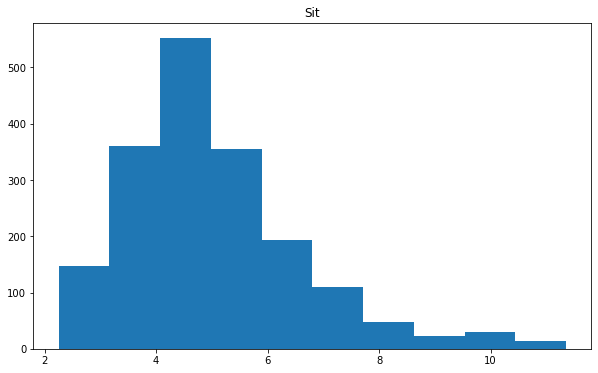

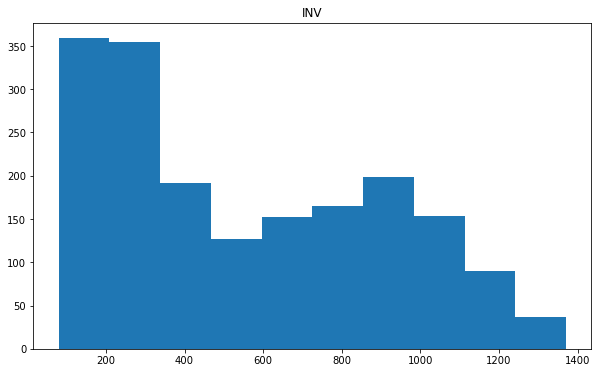

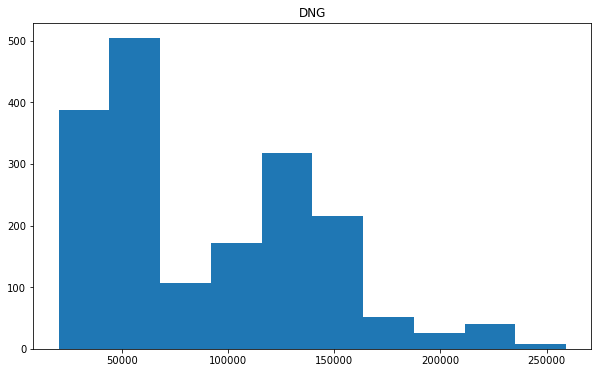

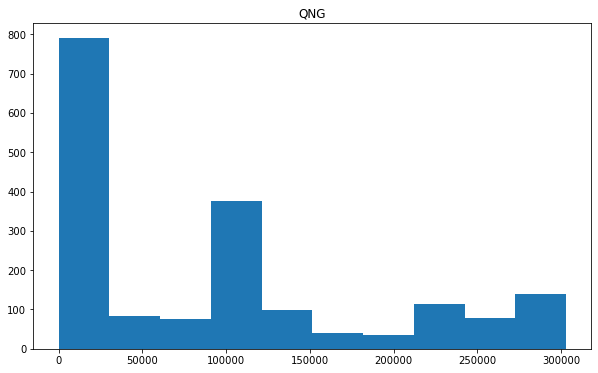

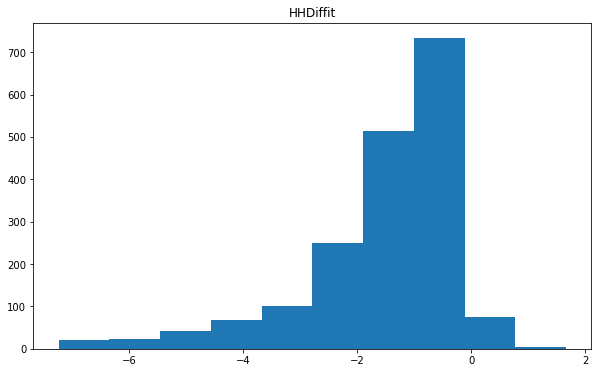

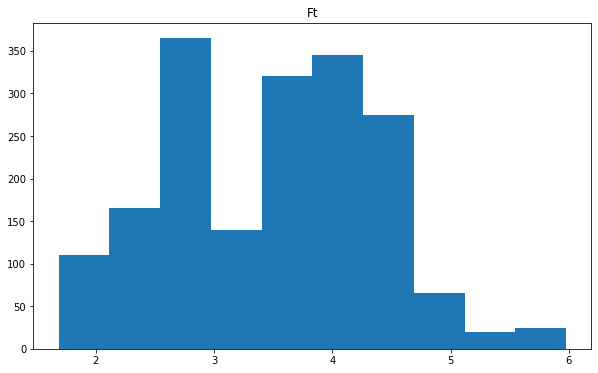

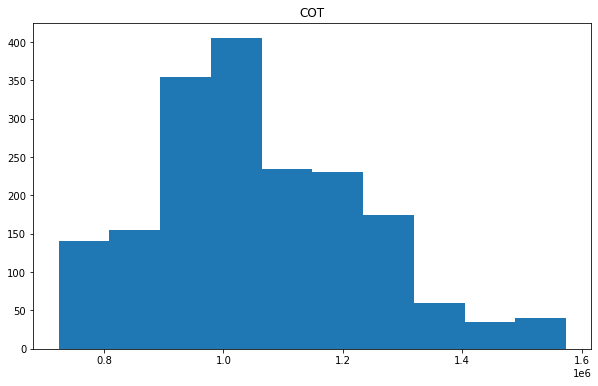

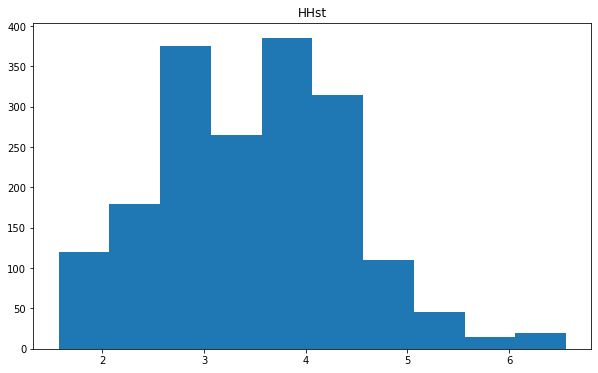

In [32]:
for col in dfnew.columns:
    plt.figure(figsize=(10,6))
    plt.hist(dfnew[col])
    plt.title(col)
    plt.show()
    print()

In [16]:
type(dfnew)

pandas.core.frame.DataFrame

In [46]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [50]:
# Question, how do I make the x-axis the date?

In [ ]:
# How do I split by node?

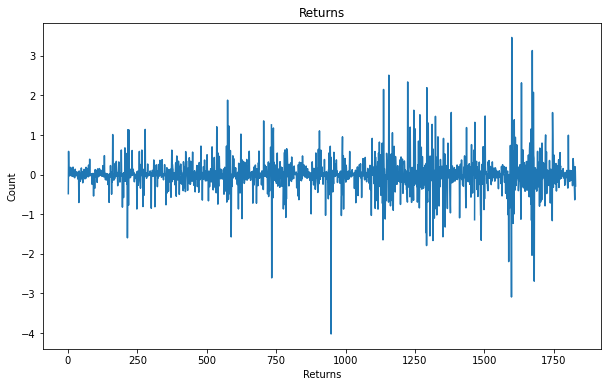

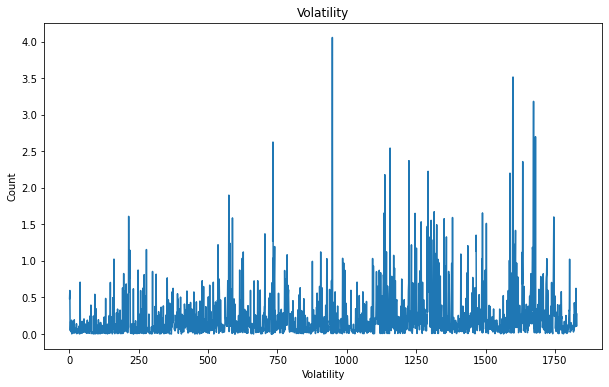

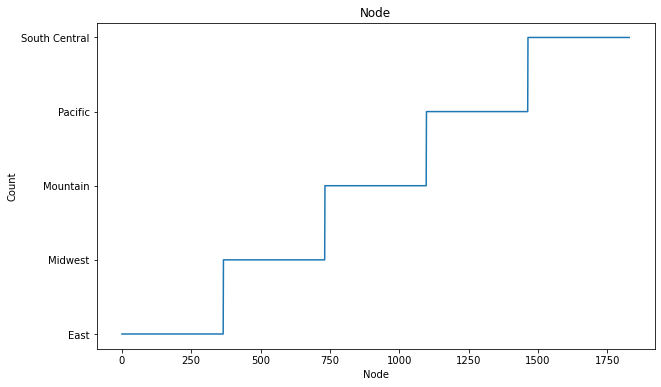

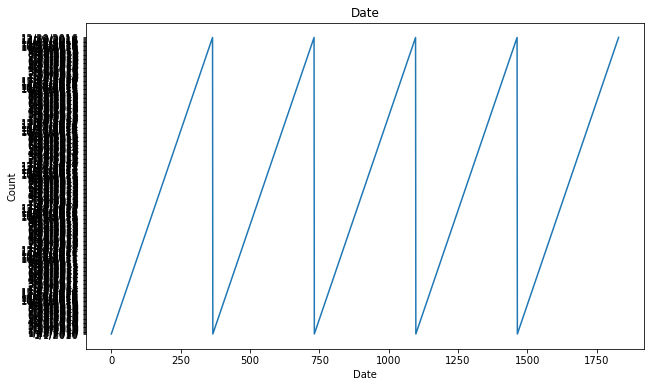

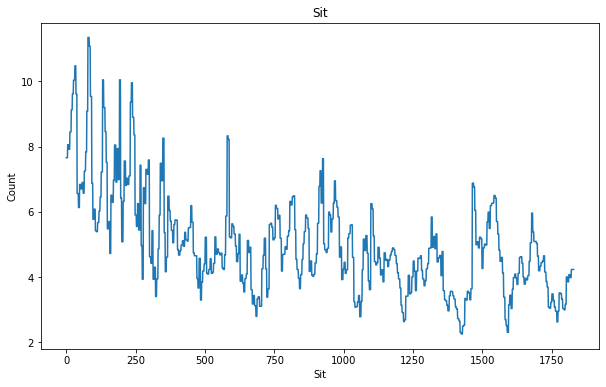

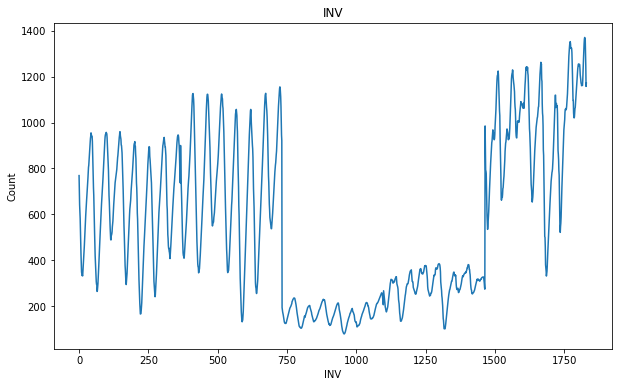

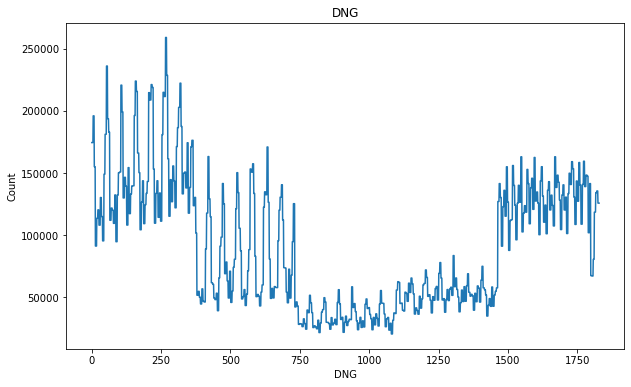

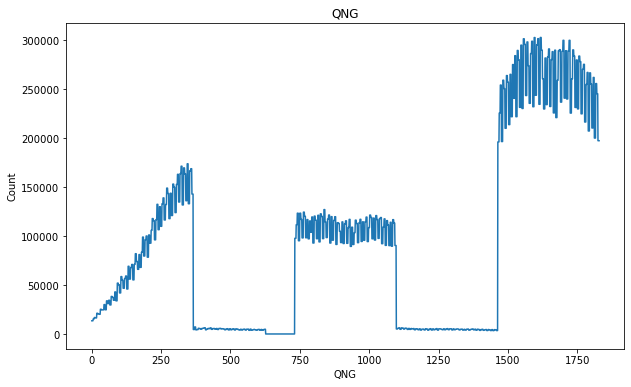

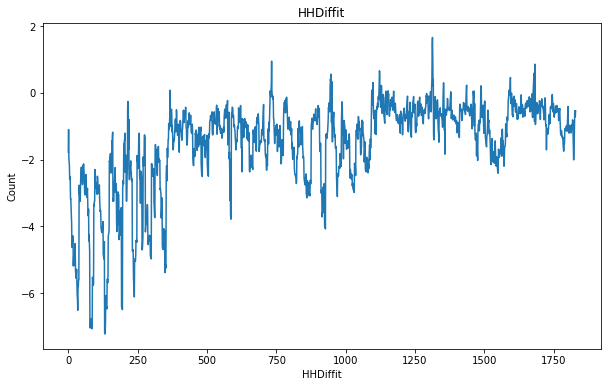

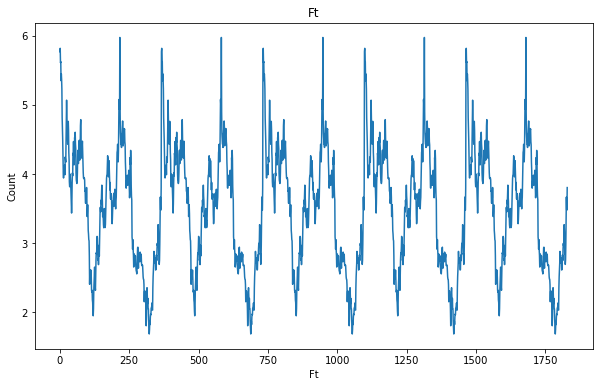

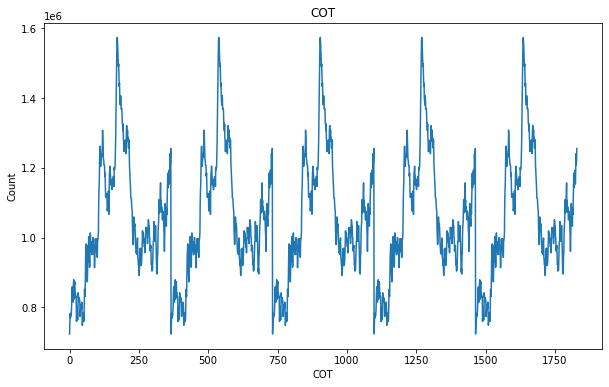

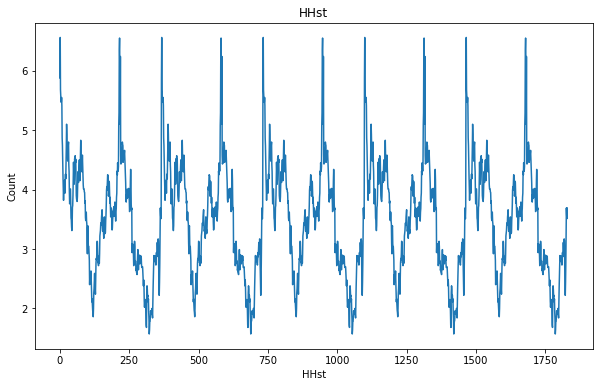

In [180]:
for col in dfnew.columns: 
    plt.figure(figsize=(10,6))
    plt.plot(dfnew[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print()

In [179]:
df3.columns

Index(['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft',
       'COT', 'HHst'],
      dtype='object')

In [178]:
df3 = dfnew.groupby(['Node']).sum()
df3.head(20)

Returns  Volatility      Sit     INV         DNG         QNG  \
Node                                                                           
East          -0.660011   45.541225  2547.14  235443  55927976.0  31721588.0   
Midwest        0.048792   71.413387  1717.20  265444  30518470.0   1267282.0   
Mountain      -2.340935   72.743124  1838.71   61575  12416580.0  39243323.0   
Pacific       -2.732024  120.334440  1468.64  105569  19148980.0   1723082.0   
South Central -6.383151  110.495149  1592.47  356338  46522334.0  93607376.0   

               HHDiffit        Ft        COT    HHst  
Node                                                  
East           -1270.54  1278.692  386273055  1276.6  
Midwest         -440.60  1278.692  386273055  1276.6  
Mountain        -562.11  1278.692  386273055  1276.6  
Pacific         -192.04  1278.692  386273055  1276.6  
South Central   -315.87  1278.692  386273055  1276.6

In [149]:
df2 = dfnew.groupby(['Date']).sum()
df2.head(20)

Returns  Volatility    Sit   INV        DNG       QNG  HHDiffit  \
Date                                                                          
1/1/2010   0.000000    0.000000  32.88  3117  522942.80  317112.2     -3.48   
1/1/2016  -3.177240    3.174855  16.37  3643  574954.00  447390.6     -5.02   
1/10/2014  0.301654    0.337981  28.24  2530  597865.00  413478.4     -6.69   
1/11/2013  0.550212    0.588963  20.99  3169  663100.25  495274.5     -5.09   
1/13/2012  0.447078    0.484824  21.59  3290  636482.00  494809.5     -7.54   
1/14/2011  0.461693    0.499581  26.71  2715  672178.25  435777.0     -4.41   
1/15/2010 -0.698424    4.582285  32.88  2607  522942.80  317112.2     -4.48   
1/15/2016  0.411321    0.448718  16.37  3297  574954.00  447390.6     -4.77   
1/16/2015 -0.281134    0.250493  20.96  2637  579491.00  440514.8     -5.56   
1/17/2014 -0.494439    0.465880  28.24  2424  597865.00  413478.4     -6.29   
1/18/2013 -1.589773    1.571900  20.99  2996  663100.25  495274.5     -3.79   
1/2/2015  -4.124651    4.131508  20.96  3090  579491.00  440514.8     -5.51   
1/20/2012  1.357930    1.404562  21.59  3097  636482.00  494809.5     -9.59   
1/21/2011 -0.942547    0.933475  26.71  2543  672178.25  435777.0     -3.86   
1/22/2010  0.484968    0.523083  32.88  2521  522942.80  317112.2     -5.08   
1/22/2016  0.714918    0.755277  16.37  3086  574954.00  447390.6     -5.37   
1/23/2015  0.695631    0.735801  20.96  2543  579491.00  440514.8     -6.21   
1/24/2014 -0.873237    0.911759  28.24  2183  597865.00  413478.4     -2.84   
1/25/2013 -0.790985    0.765319  20.99  2802  663100.25  495274.5     -3.29   
1/27/2012 -0.514847    0.486486  21.59  2966  636482.00  494809.5     -8.74   

               Ft      COT   HHst  
Date                               
1/1/2010   28.850  3620435  29.40  
1/1/2016   11.440  4679625  11.35  
1/10/2014  20.880  6379245  21.55  
1/11/2013  16.115  5873900  15.90  
1/13/2012  14.095  5673505  14.05  
1/14/2011  22.275  4260665  22.30  
1/15/2010  28.050  3912745  28.40  
1/15/2016  11.160  4556640  11.60  
1/16/2015  15.255  5097855  15.40  
1/17/2014  21.675  6438005  21.95  
1/18/2013  17.325  5874905  17.20  
1/2/2015   15.220  4784585  15.45  
1/20/2012  12.030  5762700  12.00  
1/21/2011  23.020  4182825  22.85  
1/22/2010  28.125  3849435  27.80  
1/22/2016  10.610  4479350  11.00  
1/23/2015  14.535  5002345  14.75  
1/24/2014  23.360  6286265  25.40  
1/25/2013  17.505  5734230  17.70  
1/27/2012  13.090  6016650  12.85

In [170]:
cols_date = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

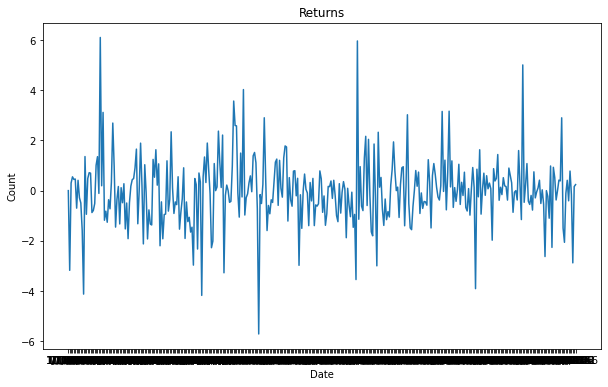

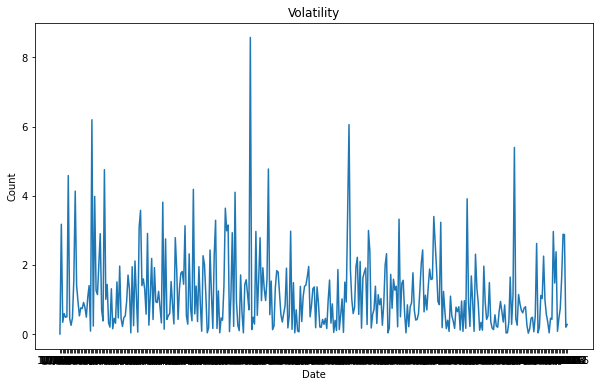

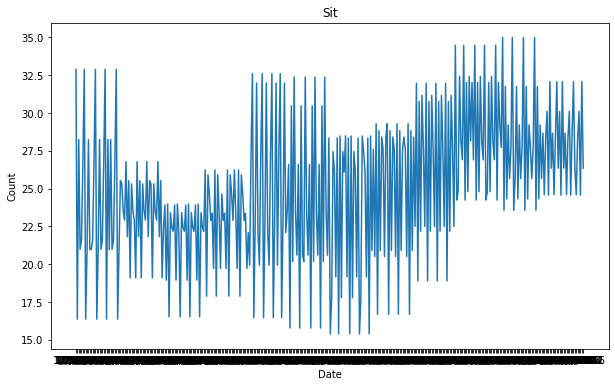

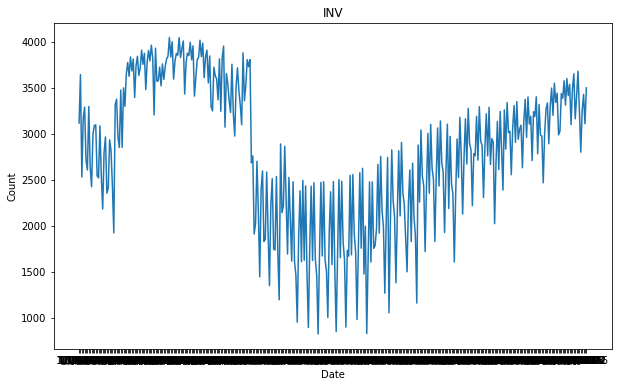

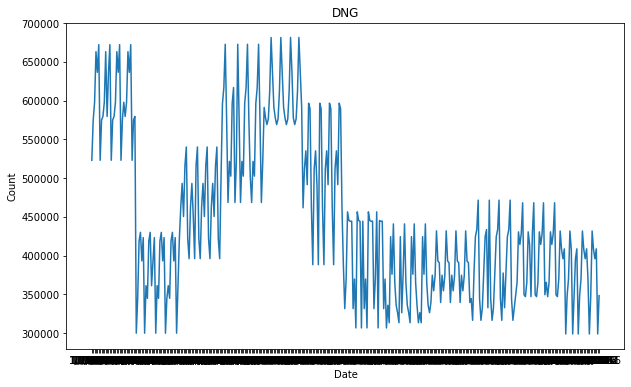

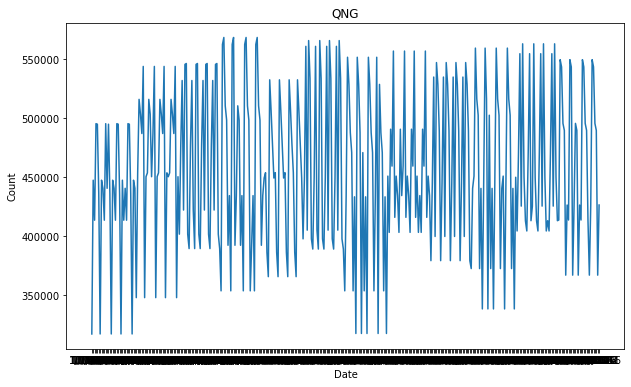

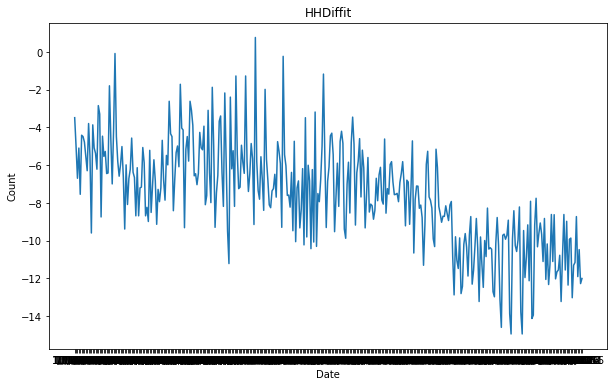

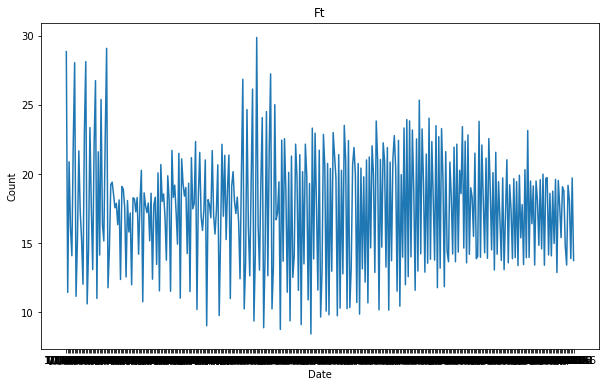

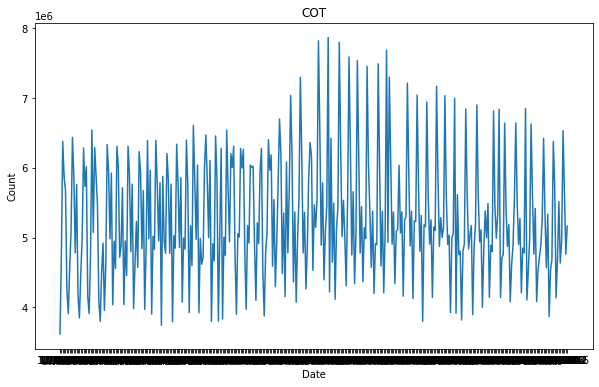

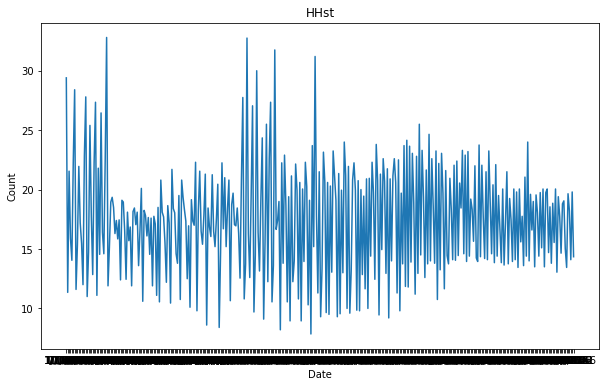

KeyError: 'Node'

<Figure size 720x432 with 0 Axes>

In [173]:
for col in cols_date:   
    plt.figure(figsize=(10,6))
    plt.plot(df2[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel("Count")
    plt.show()
    print()

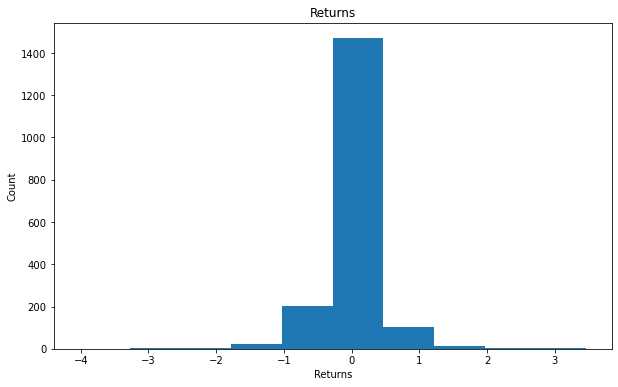

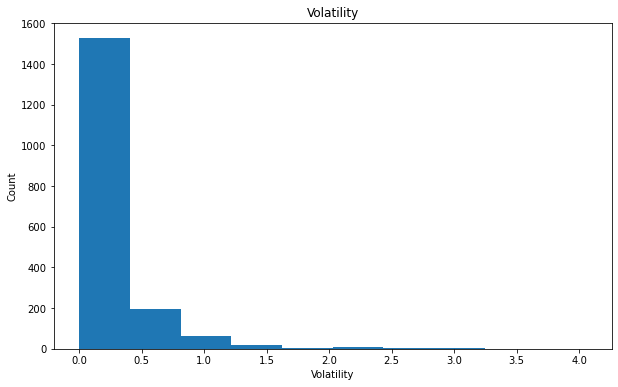

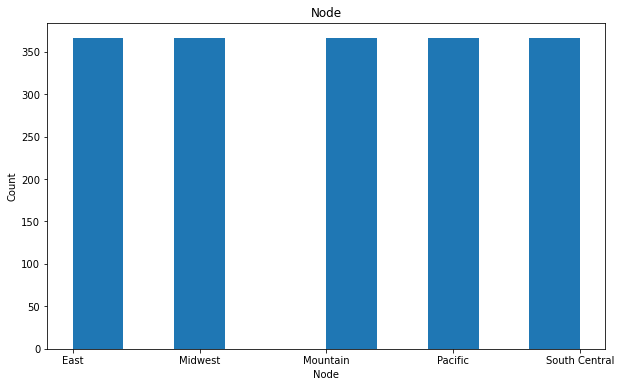

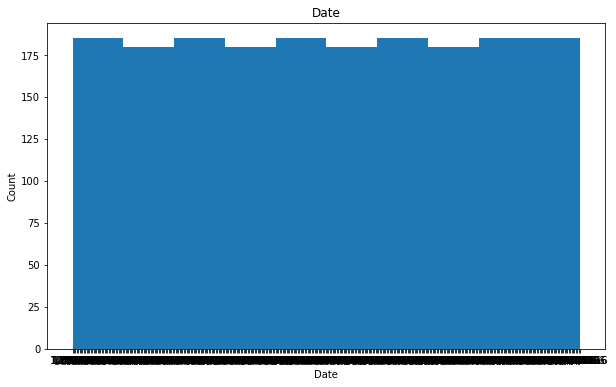

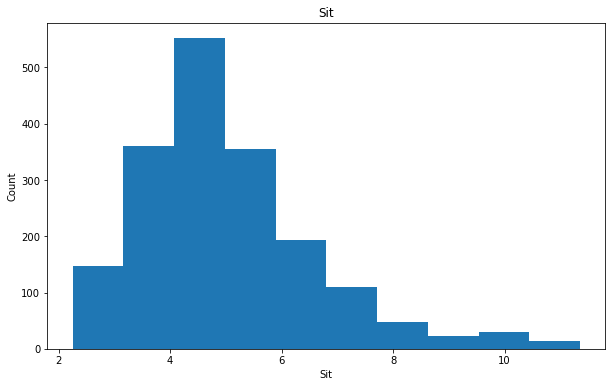

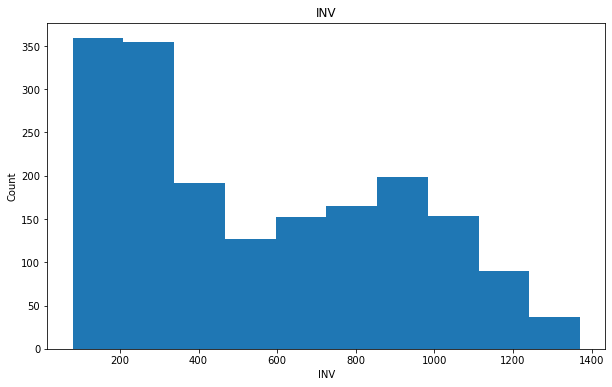

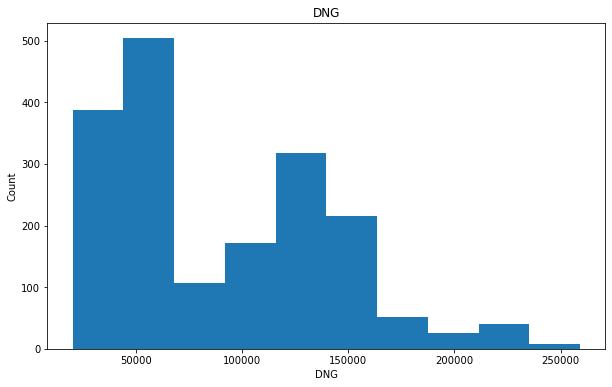

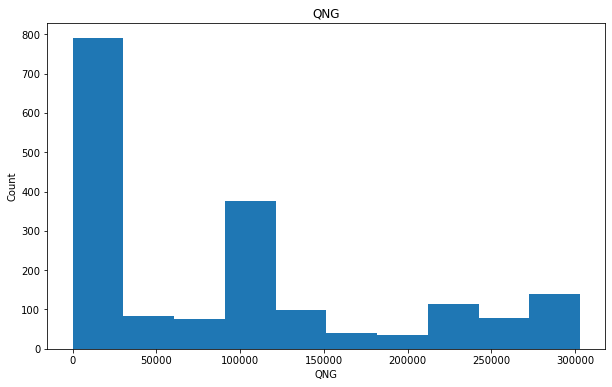

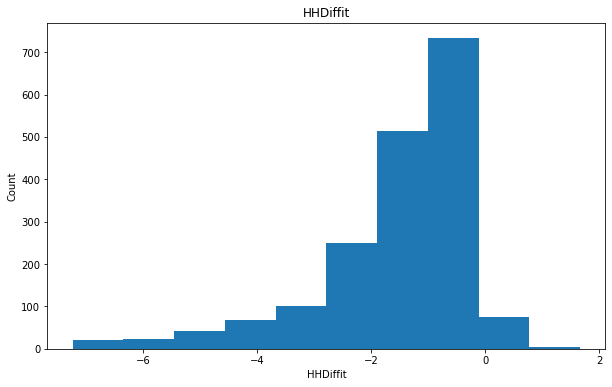

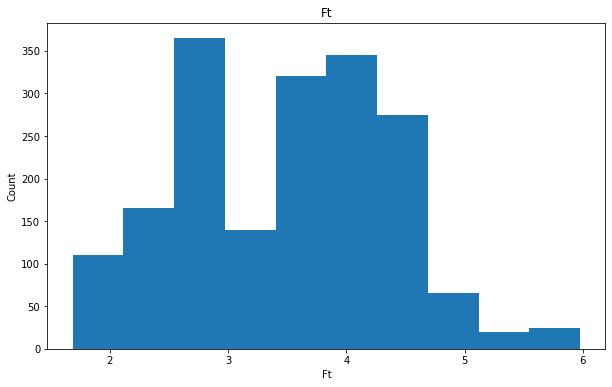

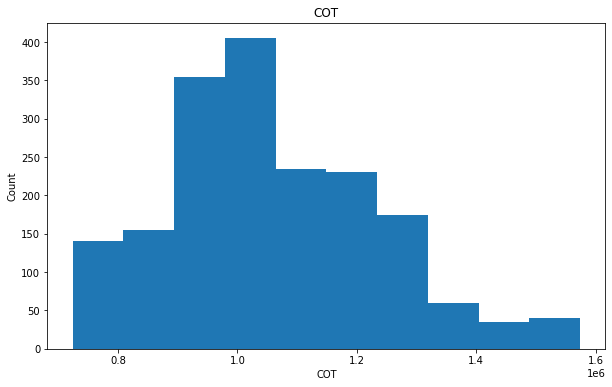

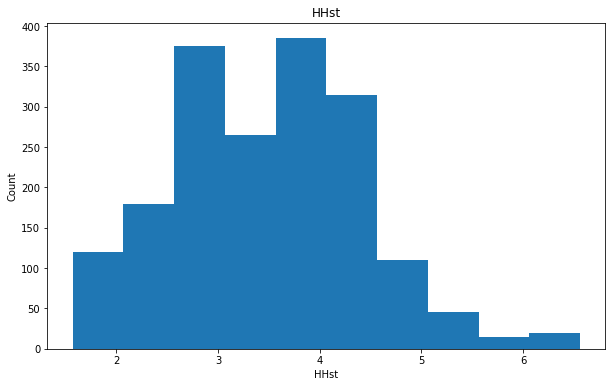

In [37]:
# To create the histograms
colsnew = ['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

for col in colsnew:
    plt.figure(figsize=(10,6))
    plt.hist(dfnew[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

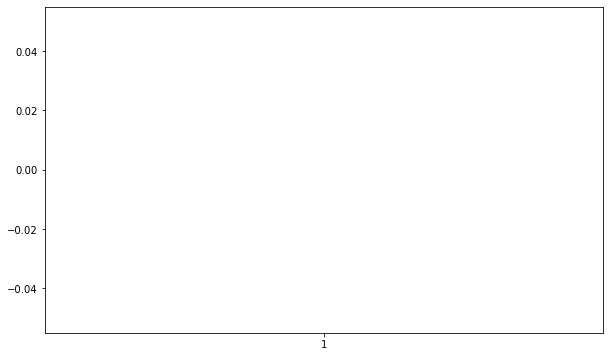

In [69]:
plt.figure(figsize=(10,6))
plt.boxplot(dfnew["Volatility"])
plt.ylabel
plt.show()

In [174]:
cols_date

['Returns',
 'Volatility',
 'Sit',
 'INV',
 'DNG',
 'QNG',
 'HHDiffit',
 'Ft',
 'COT',
 'HHst',
 'Node']

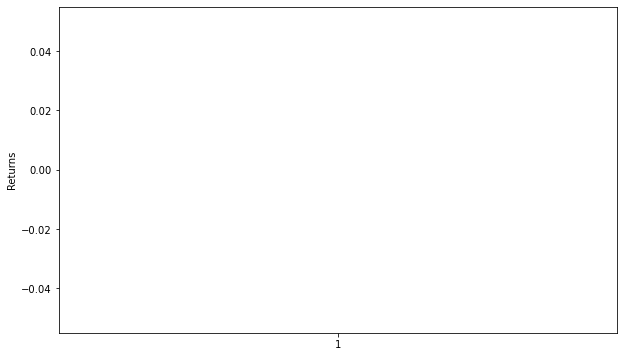

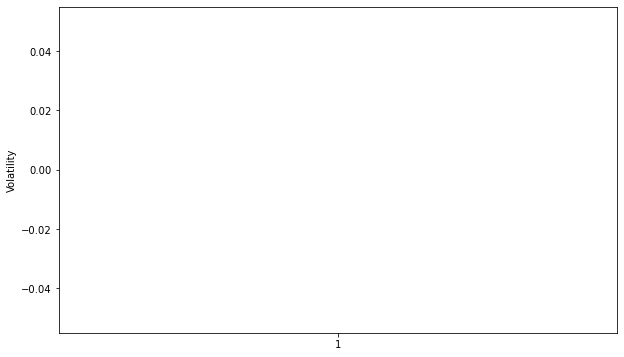

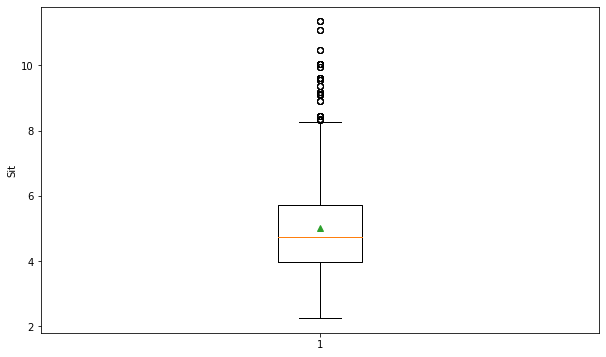

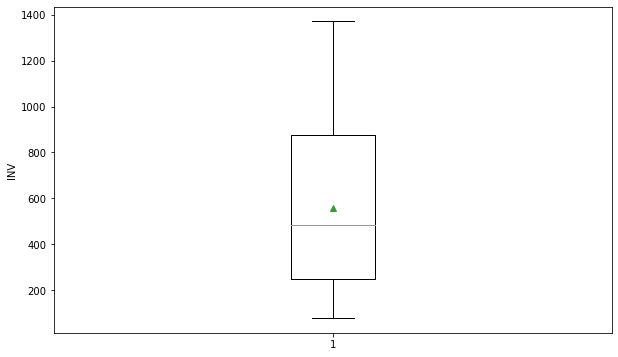

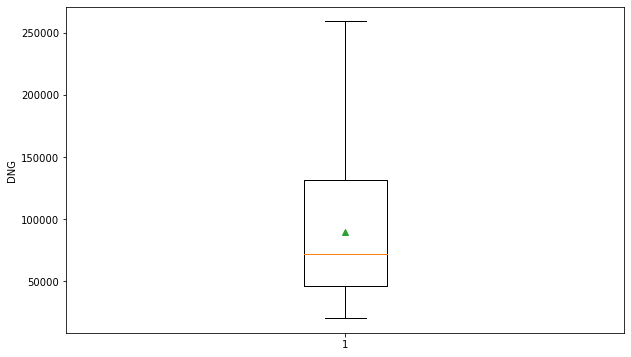

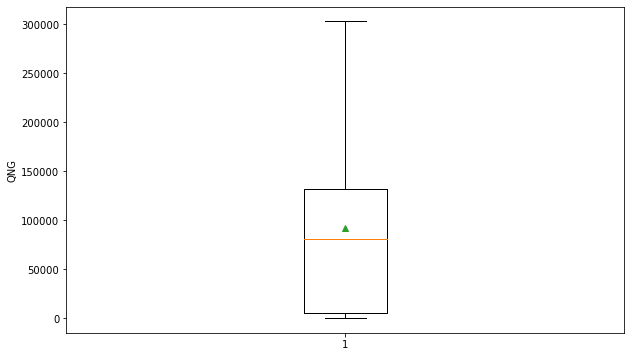

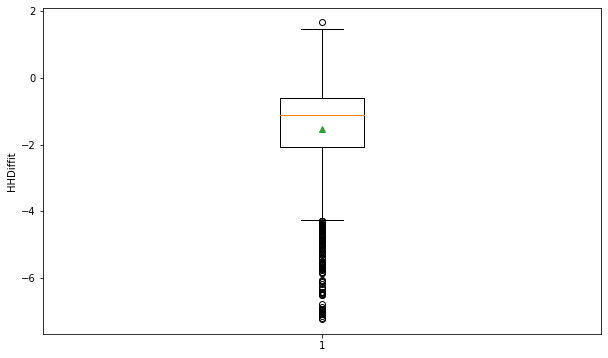

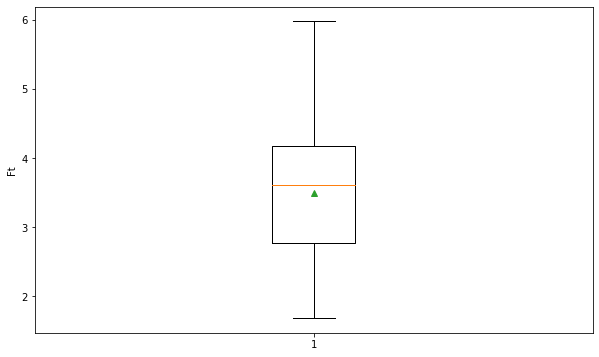

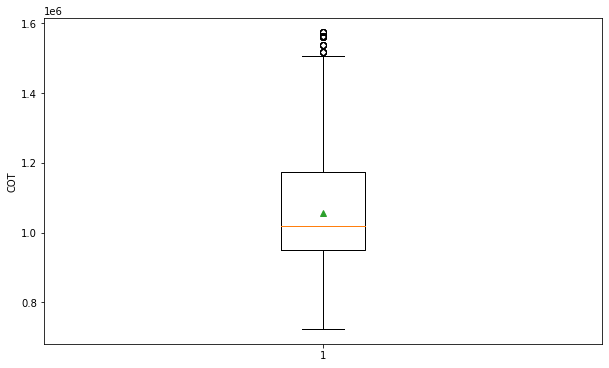

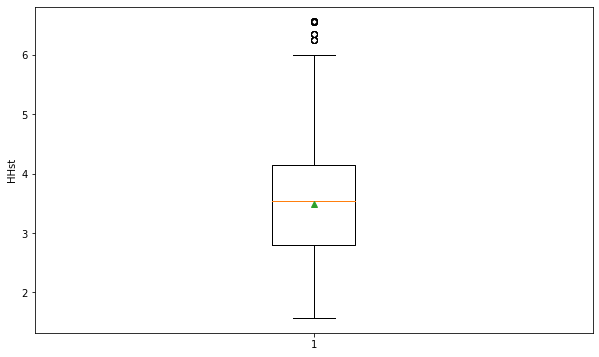

In [148]:
# to create a boxplot of all the columns in the dataset
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.boxplot(dfnew[col], showmeans=True)
    plt.ylabel(col)
    plt.show()

In [20]:
# Ins_Preprocessing-jkeme_052922-video-review
# label encode NODE
# hOw do I handle "Date"?
# Which column(s) do I One-Hot Encode? Do I need to One-Hot Encode?
# pd.concat() to combine after breaking apart

In [38]:
# This for-loop-print looks for "string" types, prints the "columns" that are strings and the number of the different 
# categories within that column.
for col in dfnew.columns:
    if type(dfnew[col].values[0]) == str:
        print(col)
        print(dfnew[col].nunique())
        print()

Node
5

Date
366



In [39]:
# This for-loop-print looks for "numeric" types, prints the "columns" that are numeric and the number of the different 
# categories within that column.
for col in dfnew.columns:
    if type(dfnew[col].values[0]) != str:
        print(col)
        print(dfnew[col].nunique())
        print()

Returns
1474

Volatility
1640

Sit
288

INV
867

DNG
420

QNG
396

HHDiffit
480

Ft
341

COT
366

HHst
222



In [74]:
cols_num = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [75]:
cols_str = ['Node']

In [40]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [ ]:
dfnew.head(10)

In [ ]:
type(dfnew.Volatility)

In [58]:
# To create the histograms
colsnew = ['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

for col in colsnew:
    print(col)
    print(type(dfnew[col]))
    print()

Returns
<class 'pandas.core.series.Series'>

Volatility
<class 'pandas.core.series.Series'>

Node
<class 'pandas.core.series.Series'>

Date
<class 'pandas.core.series.Series'>

Sit
<class 'pandas.core.series.Series'>

INV
<class 'pandas.core.series.Series'>

DNG
<class 'pandas.core.series.Series'>

QNG
<class 'pandas.core.series.Series'>

HHDiffit
<class 'pandas.core.series.Series'>

Ft
<class 'pandas.core.series.Series'>

COT
<class 'pandas.core.series.Series'>

HHst
<class 'pandas.core.series.Series'>



In [79]:
# linear model, drop_first=True
# One Hot Encode, columns with less than 10 categories.
cols_oh = ["Node"]
df_oh = pd.get_dummies(dfnew.loc[:, cols_oh], drop_first=True)
df_oh.head(100)

Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central
0              0              0             0                   0
1              0              0             0                   0
2              0              0             0                   0
3              0              0             0                   0
4              0              0             0                   0
5              0              0             0                   0
6              0              0             0                   0
7              0              0             0                   0
8              0              0             0                   0
9              0              0             0                   0
10             0              0             0                   0
11             0              0             0                   0
12             0              0             0                   0
13             0              0             0                   0
14             0              0             0                   0
15             0              0             0                   0
16             0              0             0                   0
17             0              0             0                   0
18             0              0             0                   0
19             0              0             0                   0

In [81]:
df_oh.head(500)

Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central
0               0              0             0                   0
1               0              0             0                   0
2               0              0             0                   0
3               0              0             0                   0
4               0              0             0                   0
5               0              0             0                   0
6               0              0             0                   0
7               0              0             0                   0
8               0              0             0                   0
9               0              0             0                   0
10              0              0             0                   0
11              0              0             0                   0
12              0              0             0                   0
13              0              0             0                   0
14              0              0             0                   0
15              0              0             0                   0
16              0              0             0                   0
17              0              0             0                   0
18              0              0             0                   0
19              0              0             0                   0
20              0              0             0                   0
21              0              0             0                   0
22              0              0             0                   0
23              0              0             0                   0
24              0              0             0                   0
25              0              0             0                   0
26              0              0             0                   0
27              0              0             0                   0
28              0              0             0                   0
29              0              0             0                   0
30              0              0             0                   0
31              0              0             0                   0
32              0              0             0                   0
33              0              0             0                   0
34              0              0             0                   0
35              0              0             0                   0
36              0              0             0                   0
37              0              0             0                   0
38              0              0             0                   0
39              0              0             0                   0
40              0              0             0                   0
41              0              0             0                   0
42              0              0             0                   0
43              0              0             0                   0
44              0              0             0                   0
45              0              0             0                   0
46              0              0             0                   0
47              0              0             0                   0
48              0              0             0                   0
49              0              0             0                   0
50              0              0             0                   0
51              0              0             0                   0
52              0              0             0                   0
53              0              0             0                   0
54              0              0             0                   0
55              0              0             0                   0
56              0              0             0                   0
57              0              0             0                   0
58              0              0             0      

In [82]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [83]:
dfnew.describe()

Returns   Volatility          Sit          INV            DNG  \
count  1825.000000  1825.000000  1830.000000  1830.000000    1830.000000   
mean     -0.006612     0.230426     5.007738   559.764481   89909.475410   
std       0.419628     0.355495     1.566180   348.303130   51761.103874   
min      -4.025352     0.000135     2.250000    80.000000   20309.200000   
25%      -0.112186     0.036834     3.980000   249.250000   46073.000000   
50%       0.000000     0.103798     4.720000   482.500000   71874.750000   
75%       0.093332     0.265059     5.720000   874.000000  131413.000000   
max       3.465736     4.058148    11.350000  1370.000000  259140.250000   

                 QNG     HHDiffit           Ft           COT         HHst  
count    1830.000000  1830.000000  1830.000000  1.830000e+03  1830.000000  
mean    91564.290164    -1.519760     3.493694  1.055391e+06     3.487978  
std     95923.960180     1.356882     0.872201  1.749606e+05     0.936041  
min         0.000000    -7.230000     1.687000  7.240870e+05     1.570000  
25%      4879.750000    -2.070000     2.772000  9.489800e+05     2.790000  
50%     81122.500000    -1.120000     3.611500  1.019501e+06     3.540000  
75%    132187.387500    -0.600000     4.172000  1.174981e+06     4.150000  
max    302955.500000     1.660000     5.975000  1.573733e+06     6.560000

In [84]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Date        1830 non-null   object 
 4   Sit         1830 non-null   float64
 5   INV         1830 non-null   int64  
 6   DNG         1830 non-null   float64
 7   QNG         1830 non-null   float64
 8   HHDiffit    1830 non-null   float64
 9   Ft          1830 non-null   float64
 10  COT         1830 non-null   int64  
 11  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 171.7+ KB


In [ ]:
# Complete: These are all numeric data points, there is no need to Label Encode anything
# In this dataset, Label Encode, columns less than 20 categories.
# cols_le = ["income", "education", 'occupation', "native-country"]
# df_le = df.loc[:, cols_le].apply(lambda x: LabelEncoder().fit_transform(x))
# df_le

In [85]:
cols_num = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']
df_num = df.loc[:, cols_num]
df_num.head()

Returns  Volatility   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0       NaN         NaN  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  
0  724087  5.88  
1  760159  6.56  
2  782549  5.68  
3  769887  5.56  
4  782673  5.47

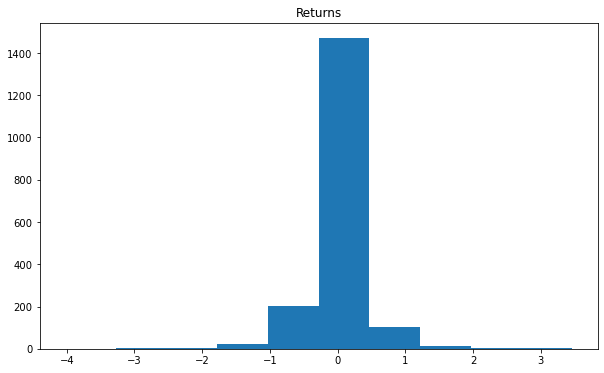

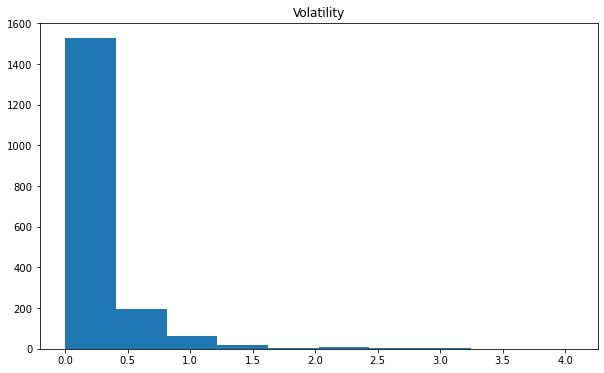

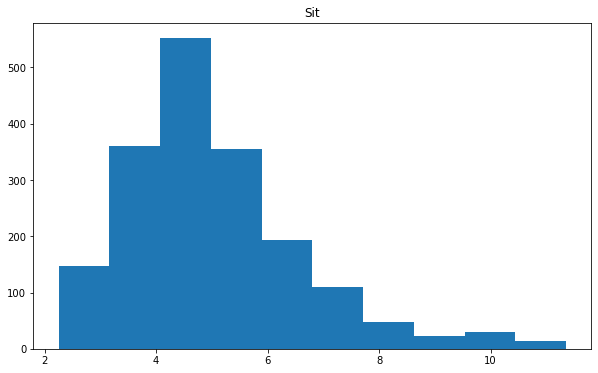

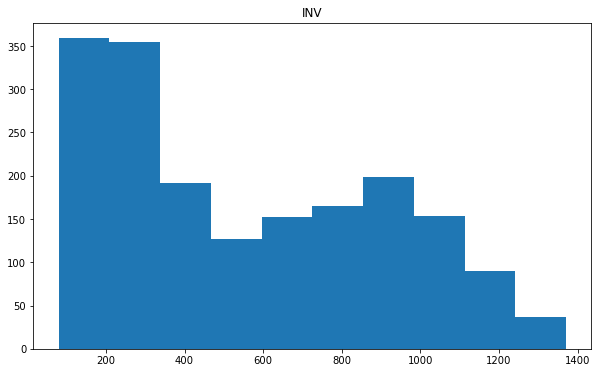

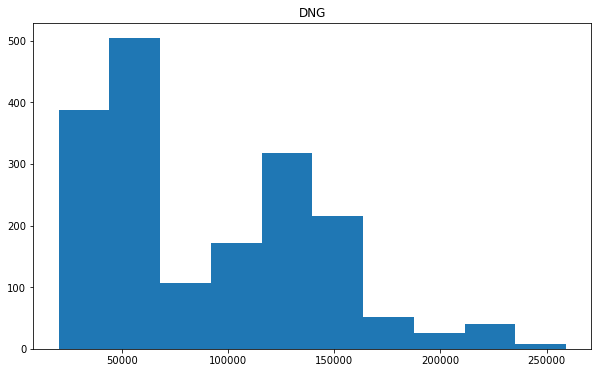

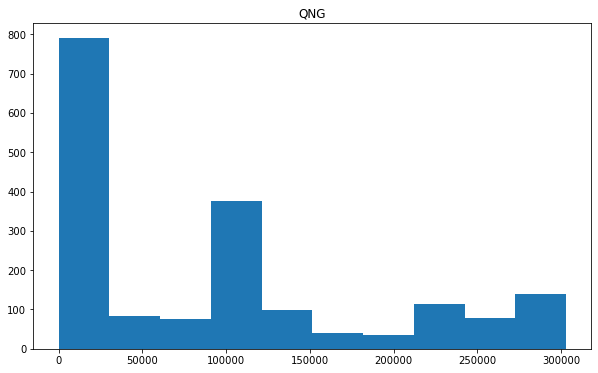

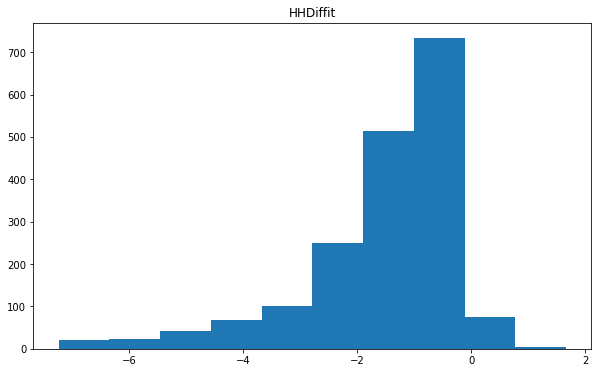

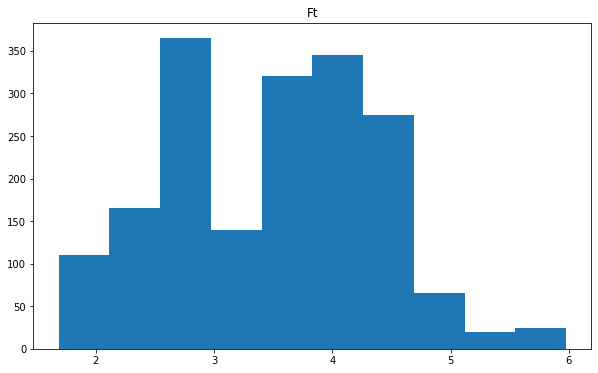

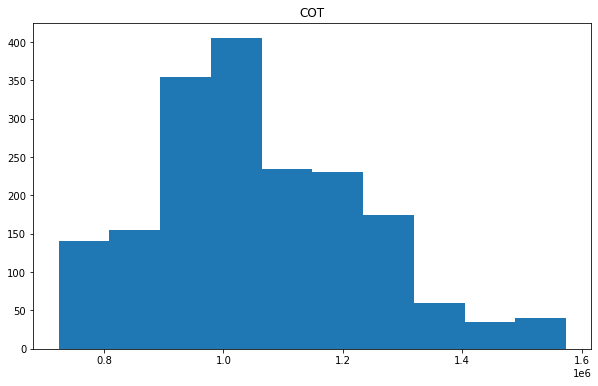

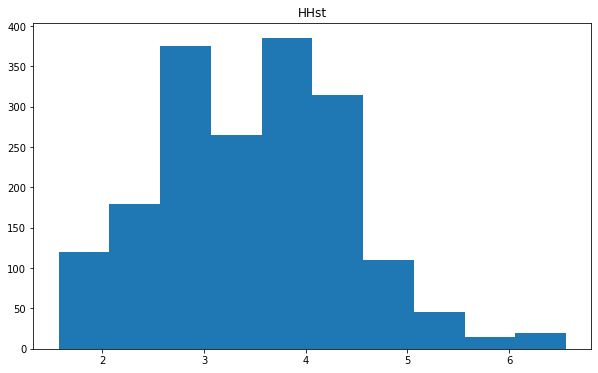

In [86]:
# Assists us in determining which columns we need to scale with standard scaling.
# 1)Large ranges 2) Histograms are not uniform.
for col in df_num.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()
    print()

In [ ]:
# First issue we ran into while data preparation/cleaning before model building with "TFE", Time Fixed Effects. 
# Time Fixed Effects, TFE, when included in model eliminates omitted variable bias caused by excluding unobserved features 
# that evolve over time but are constant across node/regions. The combined model allows to eliminate bias 
# from unobservables, feayures not included in the model, that change over time but are constant over 
# nodes and it controls for factors that differ across nodes but are constant over time.

In [ ]:
df.columns

In [ ]:
cols_tfe = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit','Ft', 'COT', 'HHst', 'TFE']

In [ ]:
# 06-04-22 Prof. Booth advises remove date, unique for every column.

In [ ]:
dftfe = df.loc[:, cols_tfe]
dftfe

In [ ]:
corrstfe = dftfe.corr()

In [ ]:
corrstfe

In [ ]:
# 06-04-22 Prof Booth, compare tree-based (remove TFE) to LM

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corrstfe)

plt.title('Natural Gas Data TFE')
plt.plot()

# 060822 What columns am I keeping?

In [87]:
df.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'TFE', 'Unnamed: 13'],
      dtype='object')

In [88]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [99]:
# I am keeping these columns
colsB = ['Returns', 'Volatility', 'Node', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit', 'Ft', 'COT', 'HHst']

In [100]:
dfB = dfnew.loc[:, colsB]

In [101]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Sit         1830 non-null   float64
 4   INV         1830 non-null   int64  
 5   DNG         1830 non-null   float64
 6   QNG         1830 non-null   float64
 7   HHDiffit    1830 non-null   float64
 8   Ft          1830 non-null   float64
 9   COT         1830 non-null   int64  
 10  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.4+ KB


In [102]:
dfB.describe()

Returns   Volatility          Sit          INV            DNG  \
count  1825.000000  1825.000000  1830.000000  1830.000000    1830.000000   
mean     -0.006612     0.230426     5.007738   559.764481   89909.475410   
std       0.419628     0.355495     1.566180   348.303130   51761.103874   
min      -4.025352     0.000135     2.250000    80.000000   20309.200000   
25%      -0.112186     0.036834     3.980000   249.250000   46073.000000   
50%       0.000000     0.103798     4.720000   482.500000   71874.750000   
75%       0.093332     0.265059     5.720000   874.000000  131413.000000   
max       3.465736     4.058148    11.350000  1370.000000  259140.250000   

                 QNG     HHDiffit           Ft           COT         HHst  
count    1830.000000  1830.000000  1830.000000  1.830000e+03  1830.000000  
mean    91564.290164    -1.519760     3.493694  1.055391e+06     3.487978  
std     95923.960180     1.356882     0.872201  1.749606e+05     0.936041  
min         0.000000    -7.230000     1.687000  7.240870e+05     1.570000  
25%      4879.750000    -2.070000     2.772000  9.489800e+05     2.790000  
50%     81122.500000    -1.120000     3.611500  1.019501e+06     3.540000  
75%    132187.387500    -0.600000     4.172000  1.174981e+06     4.150000  
max    302955.500000     1.660000     5.975000  1.573733e+06     6.560000

In [103]:
dfB.shape

(1830, 11)

In [104]:
dfB["Volatility"] = dfB.Volatility.astype(float)

In [105]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Sit         1830 non-null   float64
 4   INV         1830 non-null   int64  
 5   DNG         1830 non-null   float64
 6   QNG         1830 non-null   float64
 7   HHDiffit    1830 non-null   float64
 8   Ft          1830 non-null   float64
 9   COT         1830 non-null   int64  
 10  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.4+ KB


In [106]:
dfB.Volatility.describe()

count    1825.000000
mean        0.230426
std         0.355495
min         0.000135
25%         0.036834
50%         0.103798
75%         0.265059
max         4.058148
Name: Volatility, dtype: float64

In [107]:
type(dfB.Volatility)

pandas.core.series.Series

In [98]:
dfnew.Volatility.dtype

dtype('float64')

In [ ]:
# mask = df_sub.TotalCoinsMined > 0
# df_sub = df_sub.loc[mask].reset_index(drop=True)
# df_sub.info()

In [119]:
colsnew

['Returns',
 'Volatility',
 'Node',
 'Date',
 'Sit',
 'INV',
 'DNG',
 'QNG',
 'HHDiffit',
 'Ft',
 'COT',
 'HHst']

In [120]:
colsM = ['Returns',
 'Volatility',
 'Sit',
 'INV',
 'DNG',
 'QNG',
 'HHDiffit',
 'Ft',
 'COT',
 'HHst']

In [121]:
dfModel = dfnew.loc[:, colsM]

In [108]:
# rename all my columns
dfModel = dfB.rename(columns={"Returns":"Returns", "Volatility":"Volatility","Node":"Node","Sit":"Sit",
                             "INV":"INV", "DNG":"DNG", "QNG":"QNG",
                             "HHDiffit":"HHDiffit", "Ft":"Ft", "COT":"COT", "HHST":"HHST"})

In [109]:
# rename all my columns
dfB = dfB.rename(columns={"Returns":"Returns", "Volatility":"Volatility","Node":"Node","Sit":"Sit",
                             "INV":"INV", "DNG":"DNG", "QNG":"QNG",
                             "HHDiffit":"HHDiffit", "Ft":"Ft", "COT":"COT", "HHST":"HHST"})

In [113]:
dfModel.head()

Returns  Volatility  Node   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0       NaN         NaN  East  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  East  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  East  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  East  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  East  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  
0  724087  5.88  
1  760159  6.56  
2  782549  5.68  
3  769887  5.56  
4  782673  5.47

In [ ]:
dfModel.describe()

In [112]:
dfModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Sit         1830 non-null   float64
 4   INV         1830 non-null   int64  
 5   DNG         1830 non-null   float64
 6   QNG         1830 non-null   float64
 7   HHDiffit    1830 non-null   float64
 8   Ft          1830 non-null   float64
 9   COT         1830 non-null   int64  
 10  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 157.4+ KB


In [111]:
dfModel.Volatility = pd.to_numeric(df['Volatility'])

In [114]:
dfB = dfB.fillna(value=0).reset_index(drop=True)
dfB.head()

Returns  Volatility  Node   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0  0.000000    0.000000  East  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  East  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  East  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  East  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  East  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  
0  724087  5.88  
1  760159  6.56  
2  782549  5.68  
3  769887  5.56  
4  782673  5.47

In [ ]:
dfB.Volatility = pd.to_numeric(dfB['Volatility'])

In [123]:
dfModel = dfModel.fillna(value=0).reset_index(drop=True)
dfB.head()

Returns  Volatility  Node   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0  0.000000    0.000000  East  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  East  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  East  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  East  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  East  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  
0  724087  5.88  
1  760159  6.56  
2  782549  5.68  
3  769887  5.56  
4  782673  5.47

In [124]:
# Combine all the columns back into one dataframe
df_clean = pd.concat([dfModel, df_oh], axis=1)
df_clean.head()

Returns  Volatility   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0  0.000000    0.000000  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central  
0  724087  5.88             0              0             0                   0  
1  760159  6.56             0              0             0                   0  
2  782549  5.68             0              0             0                   0  
3  769887  5.56             0              0             0                   0  
4  782673  5.47             0              0             0                   0

In [125]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(df_clean.corr()["HHst"]).sort_values(ascending=False)

HHst                  1.000000e+00
Ft                    9.820863e-01
Sit                   5.074880e-01
COT                   1.843811e-01
Volatility            1.715410e-01
INV                   1.684768e-01
HHDiffit              1.040791e-01
QNG                   5.354408e-02
Returns               9.858435e-03
DNG                   2.130041e-03
Node_Pacific          1.408627e-15
Node_Midwest          1.407320e-15
Node_South Central    1.099453e-15
Node_Mountain         9.073105e-16
Name: HHst, dtype: float64

In [ ]:
dfModel = dfModel.fillna(value=0).reset_index(drop=True)
dfB.head()

In [128]:
df_num.head()

Returns  Volatility   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0       NaN         NaN  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  
0  724087  5.88  
1  760159  6.56  
2  782549  5.68  
3  769887  5.56  
4  782673  5.47

In [129]:
dfModel.head()

Returns  Volatility   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0  0.000000    0.000000  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  
0  724087  5.88  
1  760159  6.56  
2  782549  5.68  
3  769887  5.56  
4  782673  5.47

In [130]:
# scaler
scaler = StandardScaler().fit(dfModel)
df_scale = pd.DataFrame(scaler.transform(dfModel), columns=dfModel.columns)
df_scale.head()

Returns  Volatility       Sit       INV       DNG       QNG  HHDiffit  \
0  0.015740   -0.647103  1.693922  0.600892  1.634216 -0.814297 -0.191845   
1 -1.133121    0.716321  1.693922  0.411351  1.634216 -0.814297  0.309440   
2  1.418775    1.029385  1.693922  0.236168  1.634216 -0.814297 -0.339282   
3  0.156191   -0.474651  1.693922  0.161500  1.634216 -0.814297 -0.427745   
4  0.115908   -0.522638  1.693922  0.063857  1.634216 -0.814297 -0.494091   

         Ft       COT      HHst  
0  2.610555 -1.894109  2.556166  
1  2.665603 -1.687881  3.282828  
2  2.427061 -1.559874  2.342442  
3  2.444264 -1.632264  2.214207  
4  2.128883 -1.559165  2.118031

In [131]:
# no scaler
df_no_scale = dfModel.copy()
df_no_scale.head()

Returns  Volatility   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0  0.000000    0.000000  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst  
0  724087  5.88  
1  760159  6.56  
2  782549  5.68  
3  769887  5.56  
4  782673  5.47

In [133]:
# no scale training set
df_train_ns = pd.concat([df_no_scale, df_oh], axis=1)
df_train_ns["Returns"] = train_df.Returns
df_train_ns.head()

NameError: name 'train_df' is not defined

In [151]:
dfnew.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst'],
      dtype='object')

In [165]:
# mask = dfnew.Node.value_counts()

# Break the columns into Nodes

In [197]:
dfnew.Node.nunique()

5

In [196]:
dfnew.Node.value_counts()

East             366
Midwest          366
Mountain         366
Pacific          366
South Central    366
Name: Node, dtype: int64

In [182]:
# Complete: Yay
# Break the DataFrame by Nodes
dfnew.loc[dfnew.Node=="East"]

Returns  Volatility  Node        Date    Sit  INV        DNG        QNG  \
0         NaN         NaN  East    1/1/2010   7.66  769  174475.20   13475.00   
1   -0.481303    0.484173  East    1/8/2010   7.66  703  174475.20   13475.00   
2    0.587787    0.595347  East   1/15/2010   7.66  642  174475.20   13475.00   
3    0.058840    0.061240  East   1/22/2010   7.66  616  174475.20   13475.00   
4    0.041964    0.044199  East   1/29/2010   7.66  582  174475.20   13475.00   
5    0.167756    0.171219  East    2/5/2010   8.06  523  195992.00   15333.50   
6   -0.031375    0.029855  East   2/12/2010   8.06  471  195992.00   15333.50   
7    0.054277    0.056632  East   2/19/2010   8.06  425  195992.00   15333.50   
8    0.185461    0.189097  East   2/26/2010   8.06  390  195992.00   15333.50   
9   -0.003140    0.001340  East    3/5/2010   7.92  349  155059.00   16818.25   
10   0.087273    0.089951  East   3/12/2010   7.92  341  155059.00   16818.25   
11   0.061472    0.063897  East   3/19/2010   7.92  334  155059.00   16818.25   
12   0.057911    0.060302  East   3/26/2010   7.92  336  155059.00   16818.25   
13   0.169019    0.172494  East    4/2/2010   8.45  333   91133.00   16376.40   
14  -0.039653    0.038214  East    4/9/2010   8.45  358   91133.00   16376.40   
15  -0.013575    0.011881  East   4/16/2010   8.45  376   91133.00   16376.40   
16   0.015820    0.017800  East   4/23/2010   8.45  397   91133.00   16376.40   
17  -0.038862    0.037415  East   4/30/2010   8.45  416   91133.00   16376.40   
18   0.190447    0.194131  East    5/7/2010   9.13  444  113509.25   21159.25   
19  -0.049368    0.048024  East   5/14/2010   9.13  463  113509.25   21159.25   
20  -0.014271    0.012585  East   5/21/2010   9.13  491  113509.25   21159.25   
21   0.016294    0.018278  East   5/28/2010   9.13  518  113509.25   21159.25   
22   0.045417    0.047686  East    6/4/2010   9.62  545  120283.00   20525.50   
23  -0.057613    0.056349  East   6/11/2010   9.62  571  120283.00   20525.50   
24  -0.078680    0.077622  East   6/18/2010   9.62  596  120283.00   20525.50   
25   0.036921    0.039107  East   6/25/2010   9.62  615  120283.00   20525.50   
26   0.137256    0.140421  East    7/2/2010  10.04  638  107968.80   20124.60   
27   0.001860    0.003700  East    7/9/2010  10.04  659  107968.80   20124.60   
28   0.031053    0.033182  East   7/16/2010  10.04  681  107968.80   20124.60   
29  -0.029199    0.027658  East   7/23/2010  10.04  698  107968.80   20124.60   
30  -0.020581    0.018956  East   7/30/2010  10.04  716  107968.80   20124.60   
31   0.071133    0.073653  East    8/6/2010  10.48  737  130217.00   25251.50   
32   0.064759    0.067216  East   8/13/2010  10.48  758  130217.00   25251.50   
33   0.019608    0.021626  East   8/20/2010  10.48  781  130217.00   25251.50   
34   0.053556    0.055904  East   8/27/2010  10.48  805  130217.00   25251.50   
35  -0.108433    0.107665  East    9/3/2010   9.61  814  114906.00   24582.75   
36  -0.006860    0.005100  East   9/10/2010   9.61  835  114906.00   24582.75   
37  -0.036814    0.035347  East   9/17/2010   9.61  856  114906.00   24582.75   
38   0.000000    0.001826  East   9/24/2010   9.61  876  114906.00   24582.75   
39  -0.703919    0.708961  East   10/1/2010   6.56  896   95313.00   24669.80   
40   0.093010    0.095743  East   10/8/2010   6.56  912   95313.00   24669.80   
41   0.009820    0.011700  East  10/15/2010   6.56  930   95313.00   24669.80   
42   0.038343    0.040543  East  10/22/2010   6.56  940   95313.00   24669.80   
43   0.018634    0.020642  East  10/29/2010   6.56  955   95313.00   24669.80   
44  -0.170697    0.170537  East   11/5/2010   6.13  950  149034.00   30023.25   
45  -0.120067    0.119412  East  11/12/2010   6.13  940  149034.00   30023.25   
46  -0.012423    0.010718  East  11/19/2010   6.13  940  149034.00   30023.25   
47  -0.073467    0.072358  East  11/26/2010   6.13  940  149034.00   30023.25   
48   0.168777    0.172250  East   12/

In [198]:
dfnew.loc[dfnew.Node=="Midwest"]

Returns  Volatility     Node       Date   Sit   INV        DNG      QNG  \
366       NaN         NaN  Midwest 2010-01-01  6.48   900  123648.80  4551.40   
367  0.000000    0.000135  Midwest 2010-01-08  6.48   820  123648.80  4551.40   
368  0.000000    0.000135  Midwest 2010-01-15  6.48   750  123648.80  4551.40   
369  0.139762    0.140991  Midwest 2010-01-22  6.48   710  123648.80  4551.40   
370  0.093332    0.094108  Midwest 2010-01-29  6.48   661  123648.80  4551.40   
371 -0.572069    0.577786  Midwest 2010-02-05  6.04   604  130308.00  7166.00   
372 -0.151231    0.152841  Midwest 2010-02-12  6.04   552  130308.00  7166.00   
373  0.251314    0.253631  Midwest 2010-02-19  6.04   502  130308.00  7166.00   
374  0.619039    0.624944  Midwest 2010-02-26  6.04   464  130308.00  7166.00   
375 -0.177206    0.179070  Midwest 2010-03-05  5.72   433  101531.25  4191.50   
376  0.259220    0.261614  Midwest 2010-03-12  5.72   422  101531.25  4191.50   
377  0.159759    0.161183  Midwest 2010-03-19  5.72   419  101531.25  4191.50   
378  0.137717    0.138926  Midwest 2010-03-26  5.72   410  101531.25  4191.50   
379 -0.060259    0.060982  Midwest 2010-04-02  5.43   410   51518.40  4492.60   
380 -0.118560    0.119851  Midwest 2010-04-09  5.43   429   51518.40  4492.60   
381 -0.042864    0.043417  Midwest 2010-04-16  5.43   444   51518.40  4492.60   
382  0.049832    0.050184  Midwest 2010-04-23  5.43   462   51518.40  4492.60   
383 -0.125626    0.126987  Midwest 2010-04-30  5.43   480   51518.40  4492.60   
384 -0.134657    0.136106  Midwest 2010-05-07  5.05   506   54637.25  5787.25   
385 -0.255183    0.257808  Midwest 2010-05-14  5.05   520   54637.25  5787.25   
386 -0.084899    0.085863  Midwest 2010-05-21  5.05   546   54637.25  5787.25   
387  0.096460    0.097266  Midwest 2010-05-28  5.05   567   54637.25  5787.25   
388  0.296266    0.299021  Midwest 2010-06-04  5.61   593   49918.75  5520.75   
389 -0.284837    0.287751  Midwest 2010-06-11  5.61   619   49918.75  5520.75   
390 -0.545511    0.550968  Midwest 2010-06-18  5.61   645   49918.75  5520.75   
391  0.287682    0.290354  Midwest 2010-06-25  5.61   666   49918.75  5520.75   
392  0.471840    0.476309  Midwest 2010-07-02  5.75   691   44484.40  4868.80   
393  0.009130    0.009090  Midwest 2010-07-09  5.75   715   44484.40  4868.80   
394  0.143707    0.144974  Midwest 2010-07-16  5.75   735   44484.40  4868.80   
395 -0.134657    0.136106  Midwest 2010-07-23  5.75   751   44484.40  4868.80   
396 -0.104360    0.105513  Midwest 2010-07-30  5.75   766   44484.40  4868.80   
397 -0.061875    0.062614  Midwest 2010-08-06  5.74   788   56633.25  5683.50   
398  0.339507    0.342685  Midwest 2010-08-13  5.74   808   56633.25  5683.50   
399  0.087011    0.087725  Midwest 2010-08-20  5.74   833   56633.25  5683.50   
400  0.211970    0.213903  Midwest 2010-08-27  5.74   861   56633.25  5683.50   
401 -0.499652    0.504662  Midwest 2010-09-03  4.84   886   46731.75  5881.50   
402 -0.037740    0.038244  Midwest 2010-09-10  4.84   919   46731.75  5881.50   
403 -0.225550    0.227886  Midwest 2010-09-17  4.84   951   46731.75  5881.50   
404  0.000000    0.000135  Midwest 2010-09-24  4.84   979   46731.75  5881.50   
405  0.058496    0.058932  Midwest 2010-10-01  4.67  1011   46073.00  6334.80   
406  0.267595    0.270071  Midwest 2010-10-08  4.67  1039   46073.00  6334.80   
407  0.025752    0.025869  Midwest 2010-10-15  4.67  1071   46073.00  6334.80   
408  0.096850    0.097660  Midwest 2010-10-22  4.67  1096   46073.00  6334.80   
409  0.045120    0.045426  Midwest 2010-10-29  4.67  1120   46073.00  6334.80   
410  0.043172    0.043458  Midwest 2010-11-05  4.81  1124   88816.75  4254.00   
411 -0.246297    0.248835  Midwest 2010-11-12  4.81  1126   88816.75  4254.00   
412 -0.027399    0.027801  Midwest 2010-11-19  4.81  1115   88816.75  4254.00   
413 -0.171272    0.173078  Midwest 2010-11-26  4.81  1100   88816.75  4254.00   
414 -0.154151    0.155790  Midwest 20

In [201]:
dfnew.loc[dfnew.Node=="Mountain"]

Returns  Volatility      Node       Date   Sit  INV       DNG  \
732        NaN         NaN  Mountain 2010-01-01  5.61  195  42086.00   
733   1.258040    1.276790  Mountain 2010-01-08  5.61  185  42086.00   
734  -2.607967    2.626935  Mountain 2010-01-15  5.61  176  42086.00   
735   0.000000    0.006476  Mountain 2010-01-22  5.61  171  42086.00   
736   1.029619    1.046141  Mountain 2010-01-29  5.61  164  42086.00   
737   0.251314    0.260242  Mountain 2010-02-05  5.65  157  46116.00   
738  -0.587787    0.587045  Mountain 2010-02-12  5.65  148  46116.00   
739   0.875469    0.890486  Mountain 2010-02-19  5.65  141  46116.00   
740   1.178655    1.196630  Mountain 2010-02-26  5.65  133  46116.00   
741   0.012739    0.019339  Mountain 2010-03-05  5.53  129  42850.25   
742   0.312683    0.322210  Mountain 2010-03-12  5.53  127  42850.25   
743   0.185403    0.193688  Mountain 2010-03-19  5.53  126  42850.25   
744   0.156346    0.164347  Mountain 2010-03-26  5.53  126  42850.25   
745  -0.141079    0.135979  Mountain 2010-04-02  5.14  126  28053.60   
746  -0.146603    0.141558  Mountain 2010-04-09  5.14  126  28053.60   
747  -0.054067    0.048119  Mountain 2010-04-16  5.14  129  28053.60   
748   0.062801    0.069890  Mountain 2010-04-23  5.14  134  28053.60   
749  -0.159965    0.155049  Mountain 2010-04-30  5.14  138  28053.60   
750   0.251314    0.260242  Mountain 2010-05-07  5.20  142  28589.00   
751  -0.221161    0.216843  Mountain 2010-05-14  5.20  147  28589.00   
752  -0.071826    0.066050  Mountain 2010-05-21  5.20  154  28589.00   
753   0.081678    0.088951  Mountain 2010-05-28  5.20  161  28589.00   
754   0.545511    0.557309  Mountain 2010-06-04  6.20  165  28421.00   
755  -0.180051    0.175332  Mountain 2010-06-11  6.20  168  28421.00   
756  -0.289952    0.286305  Mountain 2010-06-18  6.20  173  28421.00   
757   0.143707    0.151585  Mountain 2010-06-25  6.20  178  28421.00   
758   0.125626    0.133328  Mountain 2010-07-02  6.10  182  26239.00   
759   0.006920    0.013500  Mountain 2010-07-09  6.10  188  26239.00   
760   0.110863    0.118420  Mountain 2010-07-16  6.10  192  26239.00   
761  -0.103990    0.098528  Mountain 2010-07-23  6.10  195  26239.00   
762  -0.078332    0.072620  Mountain 2010-07-30  6.10  197  26239.00   
763  -0.320307    0.316956  Mountain 2010-08-06  5.78  199  32496.25   
764   0.327687    0.337360  Mountain 2010-08-13  5.78  202  32496.25   
765   0.084557    0.091858  Mountain 2010-08-20  5.78  205  32496.25   
766   0.206794    0.215288  Mountain 2010-08-27  5.78  209  32496.25   
767   0.157285    0.165296  Mountain 2010-09-03  5.89  212  28681.50   
768  -0.018958    0.012667  Mountain 2010-09-10  5.89  221  28681.50   
769  -0.105892    0.100449  Mountain 2010-09-17  5.89  223  28681.50   
770   0.000000    0.006476  Mountain 2010-09-24  5.89  227  28681.50   
771  -0.294800    0.291200  Mountain 2010-10-01  5.19  230  24182.20   
772   0.176351    0.184548  Mountain 2010-10-08  5.19  232  24182.20   
773   0.017805    0.024454  Mountain 2010-10-15  5.19  233  24182.20   
774   0.068208    0.075350  Mountain 2010-10-22  5.19  236  24182.20   
775   0.032435    0.039228  Mountain 2010-10-29  5.19  235  24182.20   
776  -0.866994    0.868977  Mountain 2010-11-05  4.18  236  39570.75   
777  -0.498247    0.496632  Mountain 2010-11-12  4.18  236  39570.75   
778  -0.064539    0.058692  Mountain 2010-11-19  4.18  234  39570.75   
779  -0.474458    0.472611  Mountain 2010-11-26  4.18  227  39570.75   
780   0.559616    0.571552  Mountain 2010-12-03  4.69  222  37495.60   
781  -0.756326    0.757229  Mountain 2010-12-10  4.69  216  37495.60   
782   0.625706    0.638287  Mountain 2010-12-17  4.69  209  37495.60   
783   0.333144    0.342871  Mountain 2010-12-24  4.69  201  37495.60   
784  -0.124053    0.118787  Mountain 2010-12-31  4.69  192  37495.60   
785  -1.079920    1.083980  Mountain 2011-01-07  4.70  181  51471.00   
786   0.287682    0.296965  Mountain 2011-01-14

In [200]:
dfnew.loc[dfnew.Node=="Pacific"]

Returns  Volatility     Node       Date   Sit  INV       DNG      QNG  \
1098       NaN         NaN  Pacific 2010-01-01  6.25  268  55720.80  5109.20   
1099  0.000000    0.007558  Pacific 2010-01-08  6.25  257  55720.80  5109.20   
1100  0.000000    0.007558  Pacific 2010-01-15  6.25  246  55720.80  5109.20   
1101  0.191055    0.200477  Pacific 2010-01-22  6.25  235  55720.80  5109.20   
1102  0.122602    0.131356  Pacific 2010-01-29  6.25  221  55720.80  5109.20   
1103 -0.229574    0.224256  Pacific 2010-02-05  6.09  211  62422.00  5788.75   
1104 -0.138150    0.131940  Pacific 2010-02-12  6.09  197  62422.00  5788.75   
1105  0.230524    0.240331  Pacific 2010-02-19  6.09  193  62422.00  5788.75   
1106  0.584513    0.597774  Pacific 2010-02-26  6.09  184  62422.00  5788.75   
1107 -0.852777    0.853539  Pacific 2010-03-05  5.26  182  61800.50  6291.50   
1108  0.443205    0.455088  Pacific 2010-03-12  5.26  176  61800.50  6291.50   
1109  0.240280    0.250182  Pacific 2010-03-19  5.26  179  61800.50  6291.50   
1110  0.193585    0.203031  Pacific 2010-03-26  5.26  185  61800.50  6291.50   
1111 -0.653926    0.652748  Pacific 2010-04-02  4.47  189  44869.80  4780.00   
1112 -0.324240    0.319845  Pacific 2010-04-09  4.47  193  44869.80  4780.00   
1113 -0.136576    0.130350  Pacific 2010-04-16  4.47  199  44869.80  4780.00   
1114  0.157629    0.166725  Pacific 2010-04-23  4.47  209  44869.80  4780.00   
1115 -0.437214    0.433921  Pacific 2010-04-30  4.47  220  44869.80  4780.00   
1116  0.327213    0.337963  Pacific 2010-05-07  4.37  230  45166.25  6248.50   
1117 -0.870828    0.871766  Pacific 2010-05-14  4.37  241  45166.25  6248.50   
1118 -0.492476    0.489723  Pacific 2010-05-21  4.37  253  45166.25  6248.50   
1119  0.546544    0.559434  Pacific 2010-05-28  4.37  265  45166.25  6248.50   
1120  0.000000    0.007558  Pacific 2010-06-04  4.44  279  39438.75  5999.00   
1121  0.000000    0.007558  Pacific 2010-06-11  4.44  288  39438.75  5999.00   
1122  0.822359    0.837940  Pacific 2010-06-18  4.44  299  39438.75  5999.00   
1123 -0.297834    0.293182  Pacific 2010-06-25  4.44  305  39438.75  5999.00   
1124  0.000000    0.007558  Pacific 2010-07-02  4.91  311  38783.20  4990.40   
1125  0.039221    0.047161  Pacific 2010-07-09  4.91  318  38783.20  4990.40   
1126  0.503104    0.515570  Pacific 2010-07-16  4.91  317  38783.20  4990.40   
1127 -0.465363    0.462345  Pacific 2010-07-23  4.91  314  38783.20  4990.40   
1128 -0.523248    0.520795  Pacific 2010-07-30  4.91  313  38783.20  4990.40   
1129  0.000000    0.007558  Pacific 2010-08-06  4.58  314  53953.00  5940.75   
1130  0.000000    0.007558  Pacific 2010-08-13  4.58  314  53953.00  5940.75   
1131  0.559616    0.572634  Pacific 2010-08-20  4.58  309  53953.00  5940.75   
1132  0.794930    0.810243  Pacific 2010-08-27  4.58  301  53953.00  5940.75   
1133 -0.725937    0.725461  Pacific 2010-09-03  4.06  303  53075.25  5823.25   
1134 -0.143101    0.136939  Pacific 2010-09-10  4.06  307  53075.25  5823.25   
1135 -1.648659    1.657185  Pacific 2010-09-17  4.06  307  53075.25  5823.25   
1136  0.000000    0.007558  Pacific 2010-09-24  4.06  309  53075.25  5823.25   
1137  2.151762    2.180314  Pacific 2010-10-01  4.22  307  46613.20  4668.80   
1138  0.487295    0.499607  Pacific 2010-10-08  4.22  313  46613.20  4668.80   
1139  0.041964    0.049932  Pacific 2010-10-15  4.22  317  46613.20  4668.80   
1140  0.152192    0.161235  Pacific 2010-10-22  4.22  321  46613.20  4668.80   
1141  0.068208    0.076432  Pacific 2010-10-29  4.22  323  46613.20  4668.80   
1142 -0.682218    0.681316  Pacific 2010-11-05  3.85  327  61227.00  5660.50   
1143 -1.120591    1.123966  Pacific 2010-11-12  3.85  326  61227.00  5660.50   
1144 -0.223144    0.217763  Pacific 2010-11-19  3.85  329  61227.00  5660.50   
1145  0.000000    0.007558  Pacific 2010-11-26  3.85  313  61227.00  5660.50   
1146  0.000000    0.007558  Pacific 2010-12-03  4.74  298  53771.60  4699.40   
1147 -0

In [199]:
dfnew.loc[dfnew.Node=="South Central"]

Returns  Volatility           Node       Date   Sit   INV  \
1464           NaN         NaN  South Central 2010-01-01  6.88   985   
1465 -1.139434e+00    1.132892  South Central 2010-01-08  6.88   886   
1466  1.321756e+00    1.352310  South Central 2010-01-15  6.88   793   
1467  9.531018e-02    0.113899  South Central 2010-01-22  6.88   789   
1468  6.595797e-02    0.084260  South Central 2010-01-29  6.88   779   
1469 -8.894749e-02    0.072157  South Central 2010-02-05  6.76   719   
1470 -6.402186e-02    0.046988  South Central 2010-02-12  6.76   658   
1471  1.094842e-01    0.128211  South Central 2010-02-19  6.76   592   
1472  3.364722e-01    0.357414  South Central 2010-02-26  6.76   566   
1473 -3.742126e-01    0.360205  South Central 2010-03-05  6.04   535   
1474  2.013698e-01    0.220993  South Central 2010-03-12  6.04   548   
1475  1.295928e-01    0.148516  South Central 2010-03-19  6.04   567   
1476  1.147089e-01    0.133487  South Central 2010-03-26  6.04   581   
1477 -5.510320e-01    0.538749  South Central 2010-04-02  4.99   612   
1478 -1.670541e-01    0.151025  South Central 2010-04-09  4.99   649   
1479 -6.252036e-02    0.045472  South Central 2010-04-16  4.99   679   
1480  7.257069e-02    0.090937  South Central 2010-04-23  4.99   710   
1481 -1.863296e-01    0.170489  South Central 2010-04-30  4.99   741   
1482  3.173578e-01    0.338113  South Central 2010-05-07  5.08   770   
1483 -2.475621e-01    0.232319  South Central 2010-05-14  5.08   794   
1484 -8.191712e-02    0.065058  South Central 2010-05-21  5.08   824   
1485  9.309042e-02    0.111657  South Central 2010-05-28  5.08   846   
1486 -6.931472e-01    0.682251  South Central 2010-06-04  4.89   874   
1487 -1.034074e+00    1.026504  South Central 2010-06-11  4.89   895   
1488  0.000000e+00    0.017659  South Central 2010-06-18  4.89   912   
1489 -1.658228e+00    1.656748  South Central 2010-06-25  4.89   920   
1490  0.000000e+00    0.017659  South Central 2010-07-02  5.22   938   
1491  1.769958e-02    0.035531  South Central 2010-07-09  5.22   962   
1492  2.610138e-01    0.281219  South Central 2010-07-16  5.22   968   
1493 -2.436221e-01    0.228340  South Central 2010-07-23  5.22   962   
1494 -2.102954e-01    0.194688  South Central 2010-07-30  5.22   955   
1495 -2.392297e-01    0.223905  South Central 2010-08-06  5.17   946   
1496  7.065702e-01    0.731122  South Central 2010-08-13  5.17   930   
1497  1.484200e-01    0.167527  South Central 2010-08-20  5.17   925   
1498  3.298824e-01    0.350760  South Central 2010-08-27  5.17   930   
1499 -8.837675e-01    0.874731  South Central 2010-09-03  4.26   948   
1500 -8.338161e-02    0.066536  South Central 2010-09-10  4.26   984   
1501 -6.097656e-01    0.598056  South Central 2010-09-17  4.26  1005   
1502  0.000000e+00    0.017659  South Central 2010-09-24  4.26  1024   
1503  1.481605e+00    1.513718  South Central 2010-10-01  4.89  1055   
1504  2.195006e-01    0.239301  South Central 2010-10-08  4.89  1095   
1505  2.166150e-02    0.039532  South Central 2010-10-15  4.89  1132   
1506  8.223810e-02    0.100699  South Central 2010-10-22  4.89  1162   
1507  3.871451e-02    0.056751  South Central 2010-10-29  4.89  1188   
1508  2.500130e-02    0.042904  South Central 2010-11-05  5.01  1203   
1509 -2.123990e-01    0.196813  South Central 2010-11-12  5.01  1206   
1510 -2.316706e-02    0.005734  South Central 2010-11-19  5.01  1210   
1511 -1.425001e-01    0.126232  South Central 2010-11-26  5.01  1224   
1512 -3.528214e-01    0.338605  South Central 2010-12-03  4.98  1208   
1513 -4.054651e-01    0.391762  South Central 2010-12-10  4.98  1165   
1514  3.254224e-01    0.346256  South Central 2010-12-17  4.98  1108   
1515  2.119703e-01    0.231697  South Central 2010-12-24  4.98  1087   
1516 -8.191712e-02    0.065058  South Central 2010-12-31  4.98  1050   
1517  3.554547e-01    0.376581  South Central 2011-01-07  5.69  1030   
1518  5.001042e-02    0.068157  South Central 2011-

# END: Break the columns into Nodes

In [166]:
node_df = dfnew.groupby(['Node'])

print(node_df)

In [177]:
dfnew.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0       NaN         NaN  East   1/1/2010  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East   1/8/2010  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East  1/15/2010  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East  1/22/2010  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East  1/29/2010  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst  
0     -1.78  5.770  724087  5.88  
1     -1.10  5.818  760159  6.56  
2     -1.98  5.610  782549  5.68  
3     -2.10  5.625  769887  5.56  
4     -2.19  5.350  782673  5.47

In [176]:
dfnew.tail()

Returns  Volatility           Node        Date   Sit   INV       DNG  \
1825 -0.365460    0.351367  South Central   12/2/2016  4.23  1363  125700.6   
1826 -0.635989    0.624535  South Central   12/9/2016  4.23  1314  125700.6   
1827  0.200671    0.220287  South Central  12/16/2016  4.23  1248  125700.6   
1828  0.087011    0.105519  South Central  12/23/2016  4.23  1157  125700.6   
1829 -0.287682    0.272830  South Central  12/30/2016  4.23  1171  125700.6   

           QNG  HHDiffit     Ft      COT  HHst  
1825  197464.6     -1.02  3.368  1200726  3.21  
1826  197464.6     -0.54  3.667  1240708  3.69  
1827  197464.6     -0.66  3.484  1208078  3.57  
1828  197464.6     -0.72  3.479  1221230  3.51  
1829  197464.6     -0.54  3.804  1255674  3.69

In [185]:
dfnew["Date"] = pd.to_datetime(dfnew["Date"])

In [186]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1825 non-null   float64       
 1   Volatility  1825 non-null   float64       
 2   Node        1830 non-null   object        
 3   Date        1830 non-null   datetime64[ns]
 4   Sit         1830 non-null   float64       
 5   INV         1830 non-null   int64         
 6   DNG         1830 non-null   float64       
 7   QNG         1830 non-null   float64       
 8   HHDiffit    1830 non-null   float64       
 9   Ft          1830 non-null   float64       
 10  COT         1830 non-null   int64         
 11  HHst        1830 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 171.7+ KB


# Create the train_df and test_df 

In [194]:
# train_df = 01/01/2010 - 12/30/2015
# test_df = 01/01/2016 - 12/30/2016
# note: captures all seasonality

In [187]:
import datetime

In [189]:
train_df = dfnew.loc[(dfnew.Date >= datetime.datetime(2010,1,1)) & (dfnew.Date <= datetime.datetime(2015,12,30))]

In [190]:
test_df = dfnew.loc[(dfnew.Date >= datetime.datetime(2016,1,1)) & (dfnew.Date <= datetime.datetime(2016,12,30))]

In [192]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 313 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     265 non-null    float64       
 1   Volatility  265 non-null    float64       
 2   Node        265 non-null    object        
 3   Date        265 non-null    datetime64[ns]
 4   Sit         265 non-null    float64       
 5   INV         265 non-null    int64         
 6   DNG         265 non-null    float64       
 7   QNG         265 non-null    float64       
 8   HHDiffit    265 non-null    float64       
 9   Ft          265 non-null    float64       
 10  COT         265 non-null    int64         
 11  HHst        265 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 26.9+ KB


In [193]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1776
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1560 non-null   float64       
 1   Volatility  1560 non-null   float64       
 2   Node        1565 non-null   object        
 3   Date        1565 non-null   datetime64[ns]
 4   Sit         1565 non-null   float64       
 5   INV         1565 non-null   int64         
 6   DNG         1565 non-null   float64       
 7   QNG         1565 non-null   float64       
 8   HHDiffit    1565 non-null   float64       
 9   Ft          1565 non-null   float64       
 10  COT         1565 non-null   int64         
 11  HHst        1565 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 158.9+ KB


# END: Create the train_df and test_df

In [184]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     1825 non-null   float64
 1   Volatility  1825 non-null   float64
 2   Node        1830 non-null   object 
 3   Date        1830 non-null   object 
 4   Sit         1830 non-null   float64
 5   INV         1830 non-null   int64  
 6   DNG         1830 non-null   float64
 7   QNG         1830 non-null   float64
 8   HHDiffit    1830 non-null   float64
 9   Ft          1830 non-null   float64
 10  COT         1830 non-null   int64  
 11  HHst        1830 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 171.7+ KB


In [167]:
node_df.head(100)

Returns  Volatility           Node        Date    Sit   INV        DNG  \
0          NaN         NaN           East    1/1/2010   7.66   769  174475.20   
1    -0.481303    0.484173           East    1/8/2010   7.66   703  174475.20   
2     0.587787    0.595347           East   1/15/2010   7.66   642  174475.20   
3     0.058840    0.061240           East   1/22/2010   7.66   616  174475.20   
4     0.041964    0.044199           East   1/29/2010   7.66   582  174475.20   
5     0.167756    0.171219           East    2/5/2010   8.06   523  195992.00   
6    -0.031375    0.029855           East   2/12/2010   8.06   471  195992.00   
7     0.054277    0.056632           East   2/19/2010   8.06   425  195992.00   
8     0.185461    0.189097           East   2/26/2010   8.06   390  195992.00   
9    -0.003140    0.001340           East    3/5/2010   7.92   349  155059.00   
10    0.087273    0.089951           East   3/12/2010   7.92   341  155059.00   
11    0.061472    0.063897           East   3/19/2010   7.92   334  155059.00   
12    0.057911    0.060302           East   3/26/2010   7.92   336  155059.00   
13    0.169019    0.172494           East    4/2/2010   8.45   333   91133.00   
14   -0.039653    0.038214           East    4/9/2010   8.45   358   91133.00   
15   -0.013575    0.011881           East   4/16/2010   8.45   376   91133.00   
16    0.015820    0.017800           East   4/23/2010   8.45   397   91133.00   
17   -0.038862    0.037415           East   4/30/2010   8.45   416   91133.00   
18    0.190447    0.194131           East    5/7/2010   9.13   444  113509.25   
19   -0.049368    0.048024           East   5/14/2010   9.13   463  113509.25   
20   -0.014271    0.012585           East   5/21/2010   9.13   491  113509.25   
21    0.016294    0.018278           East   5/28/2010   9.13   518  113509.25   
22    0.045417    0.047686           East    6/4/2010   9.62   545  120283.00   
23   -0.057613    0.056349           East   6/11/2010   9.62   571  120283.00   
24   -0.078680    0.077622           East   6/18/2010   9.62   596  120283.00   
25    0.036921    0.039107           East   6/25/2010   9.62   615  120283.00   
26    0.137256    0.140421           East    7/2/2010  10.04   638  107968.80   
27    0.001860    0.003700           East    7/9/2010  10.04   659  107968.80   
28    0.031053    0.033182           East   7/16/2010  10.04   681  107968.80   
29   -0.029199    0.027658           East   7/23/2010  10.04   698  107968.80   
30   -0.020581    0.018956           East   7/30/2010  10.04   716  107968.80   
31    0.071133    0.073653           East    8/6/2010  10.48   737  130217.00   
32    0.064759    0.067216           East   8/13/2010  10.48   758  130217.00   
33    0.019608    0.021626           East   8/20/2010  10.48   781  130217.00   
34    0.053556    0.055904           East   8/27/2010  10.48   805  130217.00   
35   -0.108433    0.107665           East    9/3/2010   9.61   814  114906.00   
36   -0.006860    0.005100           East   9/10/2010   9.61   835  114906.00   
37   -0.036814    0.035347           East   9/17/2010   9.61   856  114906.00   
38    0.000000    0.001826           East   9/24/2010   9.61   876  114906.00   
39   -0.703919    0.708961           East   10/1/2010   6.56   896   95313.00   
40    0.093010    0.095743           East   10/8/2010   6.56   912   95313.00   
41    0.009820    0.011700           East  10/15/2010   6.56   930   95313.00   
42    0.038343    0.040543           East  10/22/2010   6.56   940   95313.00   
43    0.018634    0.020642           East  10/29/2010   6.56   955   95313.00   
44   -0.170697    0.170537           East   11/5/2010   6.13   950  149034.00   
45   -0.120067    0.119412           East  11/12/2010   6.13   940  149034.00   
46   -0.012423    0.010718           East  11/19/2010   6.13   940  149034.00   
47   -0.073467    0.072358           East  11/26/2010   6.13   940  149034.00   
48    0.168777    0.172250           E

C:\Users\Babatunde Onwukeme\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unhashable type: 'numpy.ndarray'

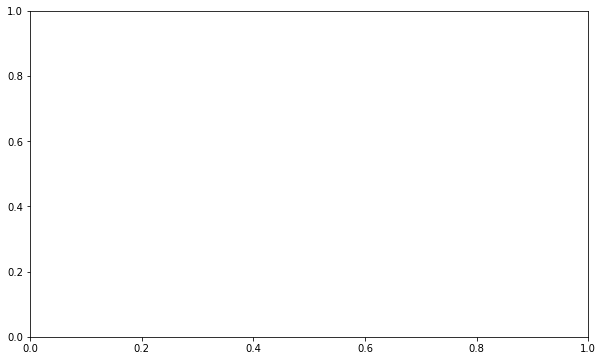

In [168]:
for col in cols_date:   
    plt.figure(figsize=(10,6))
    plt.plot(node_df[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel("Count")
    plt.show()
    print()

In [ ]:

# First issue we ran into while data preparation/cleaning before model building with "TFE", Time Fixed Effects. 
# Time Fixed Effects, TFE, when included in model eliminates omitted variable bias caused by excluding unobserved features 
# that evolve over time but are constant across node/regions. The combined model allows to eliminate bias 
# from unobservables, feayures not included in the model, that change over time but are constant over 
# nodes and it controls for factors that differ across nodes but are constant over time.
df.columns
cols_tfe = ['Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG', 'HHDiffit','Ft', 'COT', 'HHst', 'TFE']
e
# 06-04-22 Prof. Booth advises remove date, unique for every column.
dftfe = df.loc[:, cols_tfe]
dftfe
corrstfe = dftfe.corr()
corrstfe
# 06-04-22 Prof Booth, compare tree-based (remove TFE) to LM
plt.figure(figsize=(12,12))
sns.heatmap(corrstfe)
​
plt.title('Natural Gas Data TFE')
plt.plot()